# Setting up libraries and initial data cleaning

In [645]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
!head -n 1 data.csv

head: data.csv: No such file or directory


http://www2.psy.unsw.edu.au/dass/

In [4]:
df = pd.read_csv('data.csv', delimiter='\t')

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 172 columns):
 #    Column                 Dtype 
---   ------                 ----- 
 0    Q1A                    int64 
 1    Q1I                    int64 
 2    Q1E                    int64 
 3    Q2A                    int64 
 4    Q2I                    int64 
 5    Q2E                    int64 
 6    Q3A                    int64 
 7    Q3I                    int64 
 8    Q3E                    int64 
 9    Q4A                    int64 
 10   Q4I                    int64 
 11   Q4E                    int64 
 12   Q5A                    int64 
 13   Q5I                    int64 
 14   Q5E                    int64 
 15   Q6A                    int64 
 16   Q6I                    int64 
 17   Q6E                    int64 
 18   Q7A                    int64 
 19   Q7I                    int64 
 20   Q7E                    int64 
 21   Q8A                    int64 
 22   Q8I                 

In [6]:
np.unique(df.isna(), return_counts=True)

(array([False,  True]), array([6829895,   11405]))

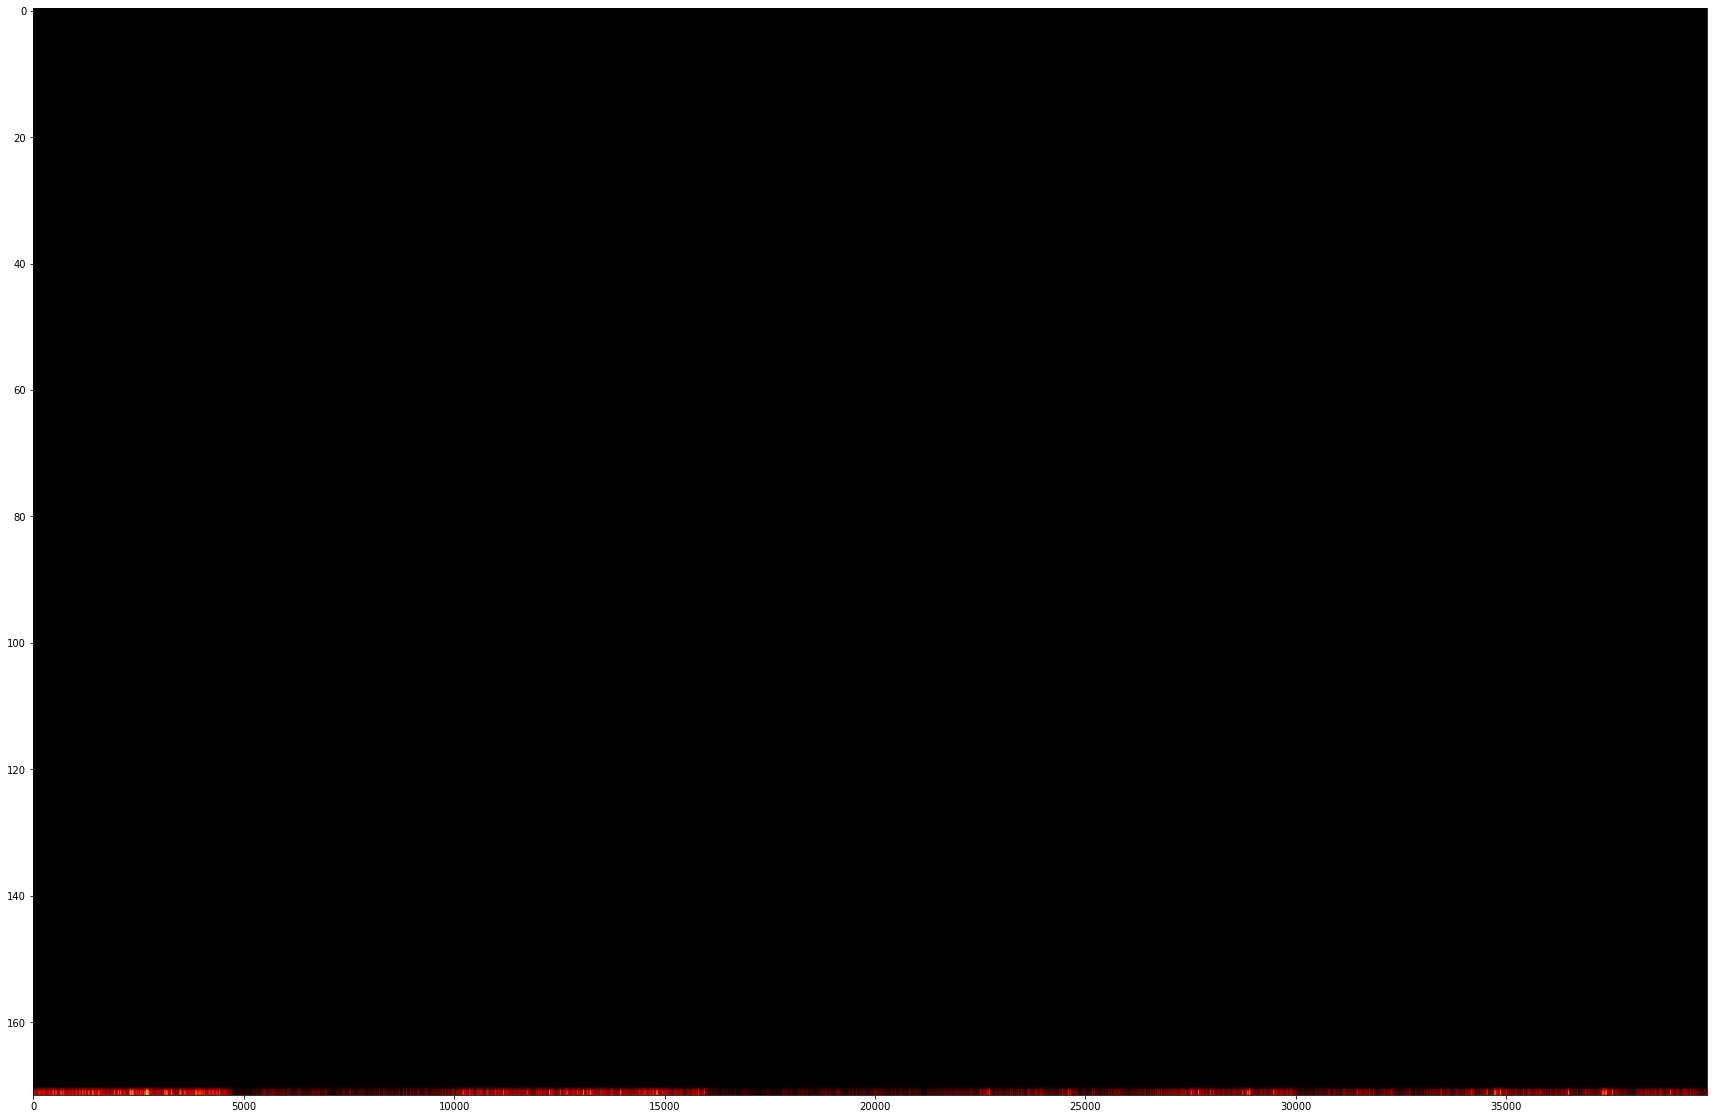

In [7]:
plt.figure(figsize=(30, 20))
plt.imshow(df.isna().T,cmap='gist_heat', aspect='auto')

In [8]:
df['major'].fillna('None', inplace=True)

In [9]:
np.unique(np.unique(df['major'], return_counts=True)[1])

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    53,    54,    57,    58,    59,    65,
          66,    68,    69,    71,    72,    73,    74,    75,    76,
          77,    79,    81,    82,    96,    98,   101,   102,   105,
         106,   117,   122,   133,   135,   137,   143,   156,   157,
         159,   163,   164,   166,   167,   169,   179,   184,   186,
         188,   195,   202,   204,   208,   214,   261,   275,   276,
         312,   316,   320,   348,   524,   580,   582,   607,   621,
         850,  1026, 11425])

In [12]:
q_answers = df[df.columns[0:126:3]]
q_time = df[df.columns[2:128:3]]
q_order = df[df.columns[1:127:3]]

<AxesSubplot:>

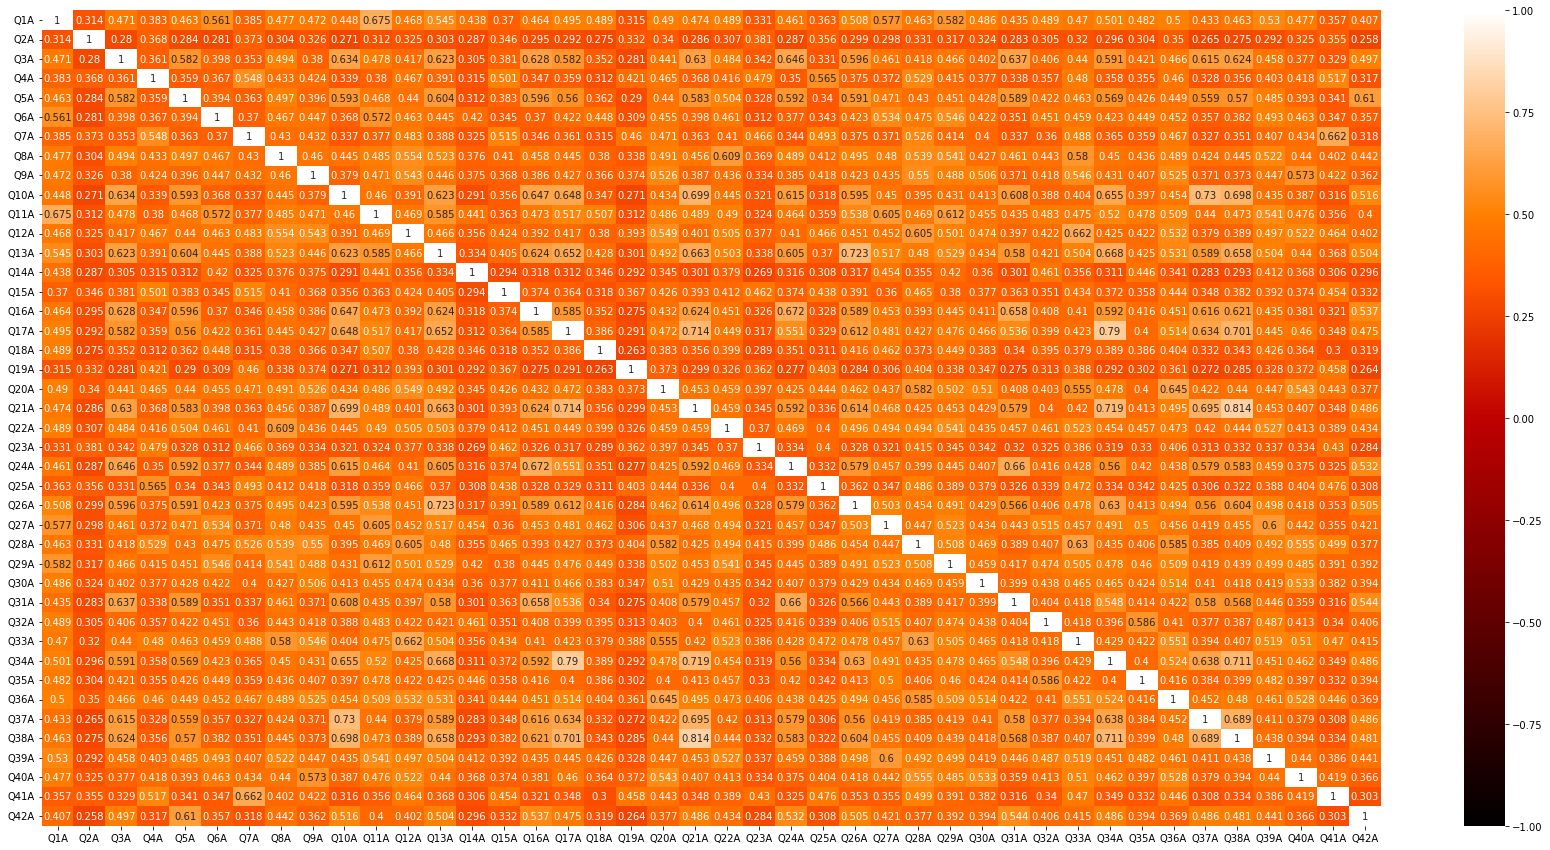

In [13]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

https://neurocogsystem.com/wp-content/uploads/2021/02/DASS-42-Scoring.pdf

In [10]:
depr = [2, 4, 9, 12, 15, 16, 20, 23, 25, 30, 33, 36, 37, 41]
anx = [1, 3, 6, 8, 14, 18, 19, 22, 24, 27, 29, 35, 39, 40]
strss = [0, 5, 7, 10, 11, 13, 17, 21, 26, 28, 31, 32, 34, 38]

<AxesSubplot:>

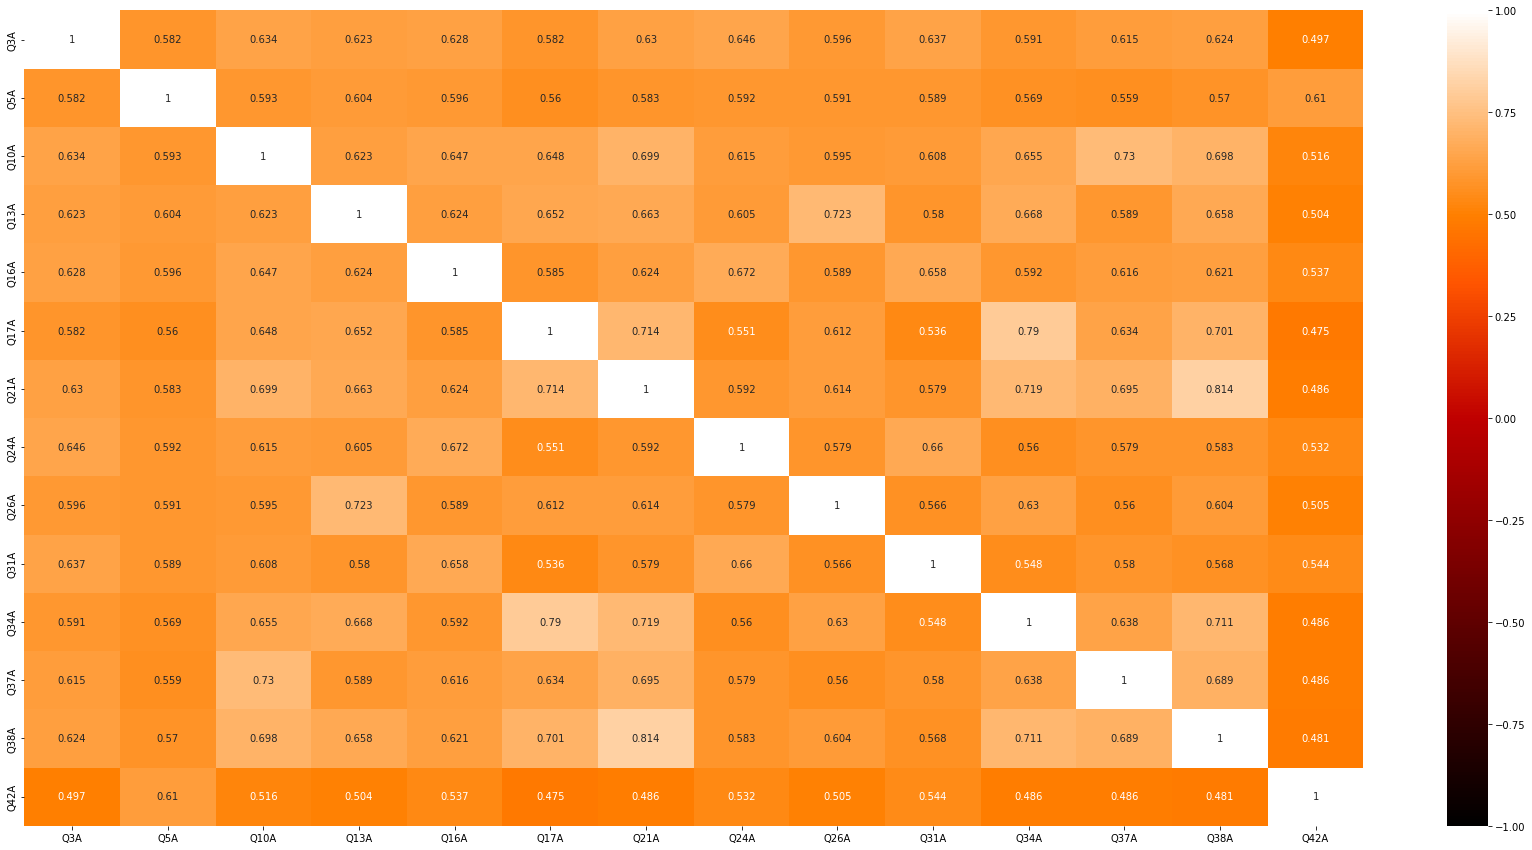

In [14]:
plt.figure(figsize=(30,15))
sns.heatmap(q_answers[q_answers.columns[depr]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

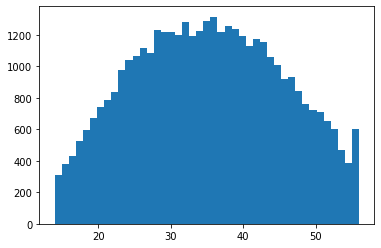

In [15]:
_ = plt.hist(np.sum(q_answers[q_answers.columns[strss]], axis=1), bins=43)

## Idea - calculate DASS scores and then check how do they relate to the features as in age, sex, education etc...

In [16]:
LVL_S = np.sum(q_answers[q_answers.columns[strss]], axis=1)
LVL_A = np.sum(q_answers[q_answers.columns[anx]], axis=1)
LVL_D = np.sum(q_answers[q_answers.columns[depr]], axis=1)
LVL_S.name = "LVL_S"
LVL_A.name = "LVL_A"
LVL_D.name = "LVL_D"

In [115]:
features_df[features_df.columns[29:]].head(5)

education  urban  gender  engnat  age  screensize  uniquenetworklocation  \
0          2      3       2       2   16           1                      1   
1          2      3       2       1   16           2                      1   
2          2      3       2       2   17           2                      1   
3          1      3       2       1   13           2                      1   
4          3      2       2       2   19           2                      2   

   hand  religion  orientation  race  voted  married  familysize  major  \
0     1        12            1    10      2        1           2   2954   
1     2         7            0    70      2        1           4   2954   
2     1         4            3    60      1        1           3   2954   
3     2         4            5    70      2        1           5   4168   
4     3        10            1    10      2        1           4   3310   

   LVL_S  LVL_A  LVL_D  
0     54     48     41  
1     41     31     38  
2     31     26     53  
3     30     31     30  
4     43     54     46

In [17]:
#plt.figure(figsize=(16,9))
df = df.join(LVL_S).join(LVL_A).join(LVL_D)

In [617]:
features_df = df[df.columns[128:]].copy()

In [618]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   introelapse            39775 non-null  int64 
 1   testelapse             39775 non-null  int64 
 2   surveyelapse           39775 non-null  int64 
 3   TIPI1                  39775 non-null  int64 
 4   TIPI2                  39775 non-null  int64 
 5   TIPI3                  39775 non-null  int64 
 6   TIPI4                  39775 non-null  int64 
 7   TIPI5                  39775 non-null  int64 
 8   TIPI6                  39775 non-null  int64 
 9   TIPI7                  39775 non-null  int64 
 10  TIPI8                  39775 non-null  int64 
 11  TIPI9                  39775 non-null  int64 
 12  TIPI10                 39775 non-null  int64 
 13  VCL1                   39775 non-null  int64 
 14  VCL2                   39775 non-null  int64 
 15  VCL3               

In [20]:
print('Are there NaN values? ' + str(np.any(features_df.isna())))
print('Duplications: ' + str(features_df.duplicated().sum()))

Are there NaN values? False
Duplications: 0


In [150]:
def value_integerizer(dataframe, column):
    col_name, _ = np.unique(dataframe[column].astype(str),return_counts=True)
    dataframe[column] = dataframe[column].replace(to_replace=col_name, value=([x+1 for x in range(len(col_name))]))
    print(col_name)
    return dataframe

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler

In [26]:
MultiLabelBinarizer().fit_transform(features_df['major'])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [623]:
print(features_df['major'].value_counts())

2954    11425
1450     1026
3310      850
643       621
98        607
        ...  
925         1
341         1
3966        1
4345        1
4303        1
Name: major, Length: 5309, dtype: int64


## Threw out major... too many issues

In [702]:
features_df = value_integerizer(features_df, 'major')
scaled_df = StandardScaler().fit_transform(features_df[features_df.columns[3:-4]])

['1' '10' '100' ... '997' '998' '999']


In [704]:
scaled_df = pd.DataFrame(scaled_df,features_df.index, features_df.columns[3:-4])

In [706]:
target_df = features_df[features_df.columns[-3:]]

In [707]:
features_m_df = features_df.copy()

In [708]:
features_m_df['major'][features_df['major'] == 2954] = 0
features_m_df['major'][features_df['major'] != 2954] = 1

In [709]:
scaled_m_df = StandardScaler().fit_transform(features_m_df[features_m_df.columns[3:-3]])
scaled_m_df = pd.DataFrame(scaled_m_df,features_m_df.index, features_m_df.columns[3:-3])

<AxesSubplot:>

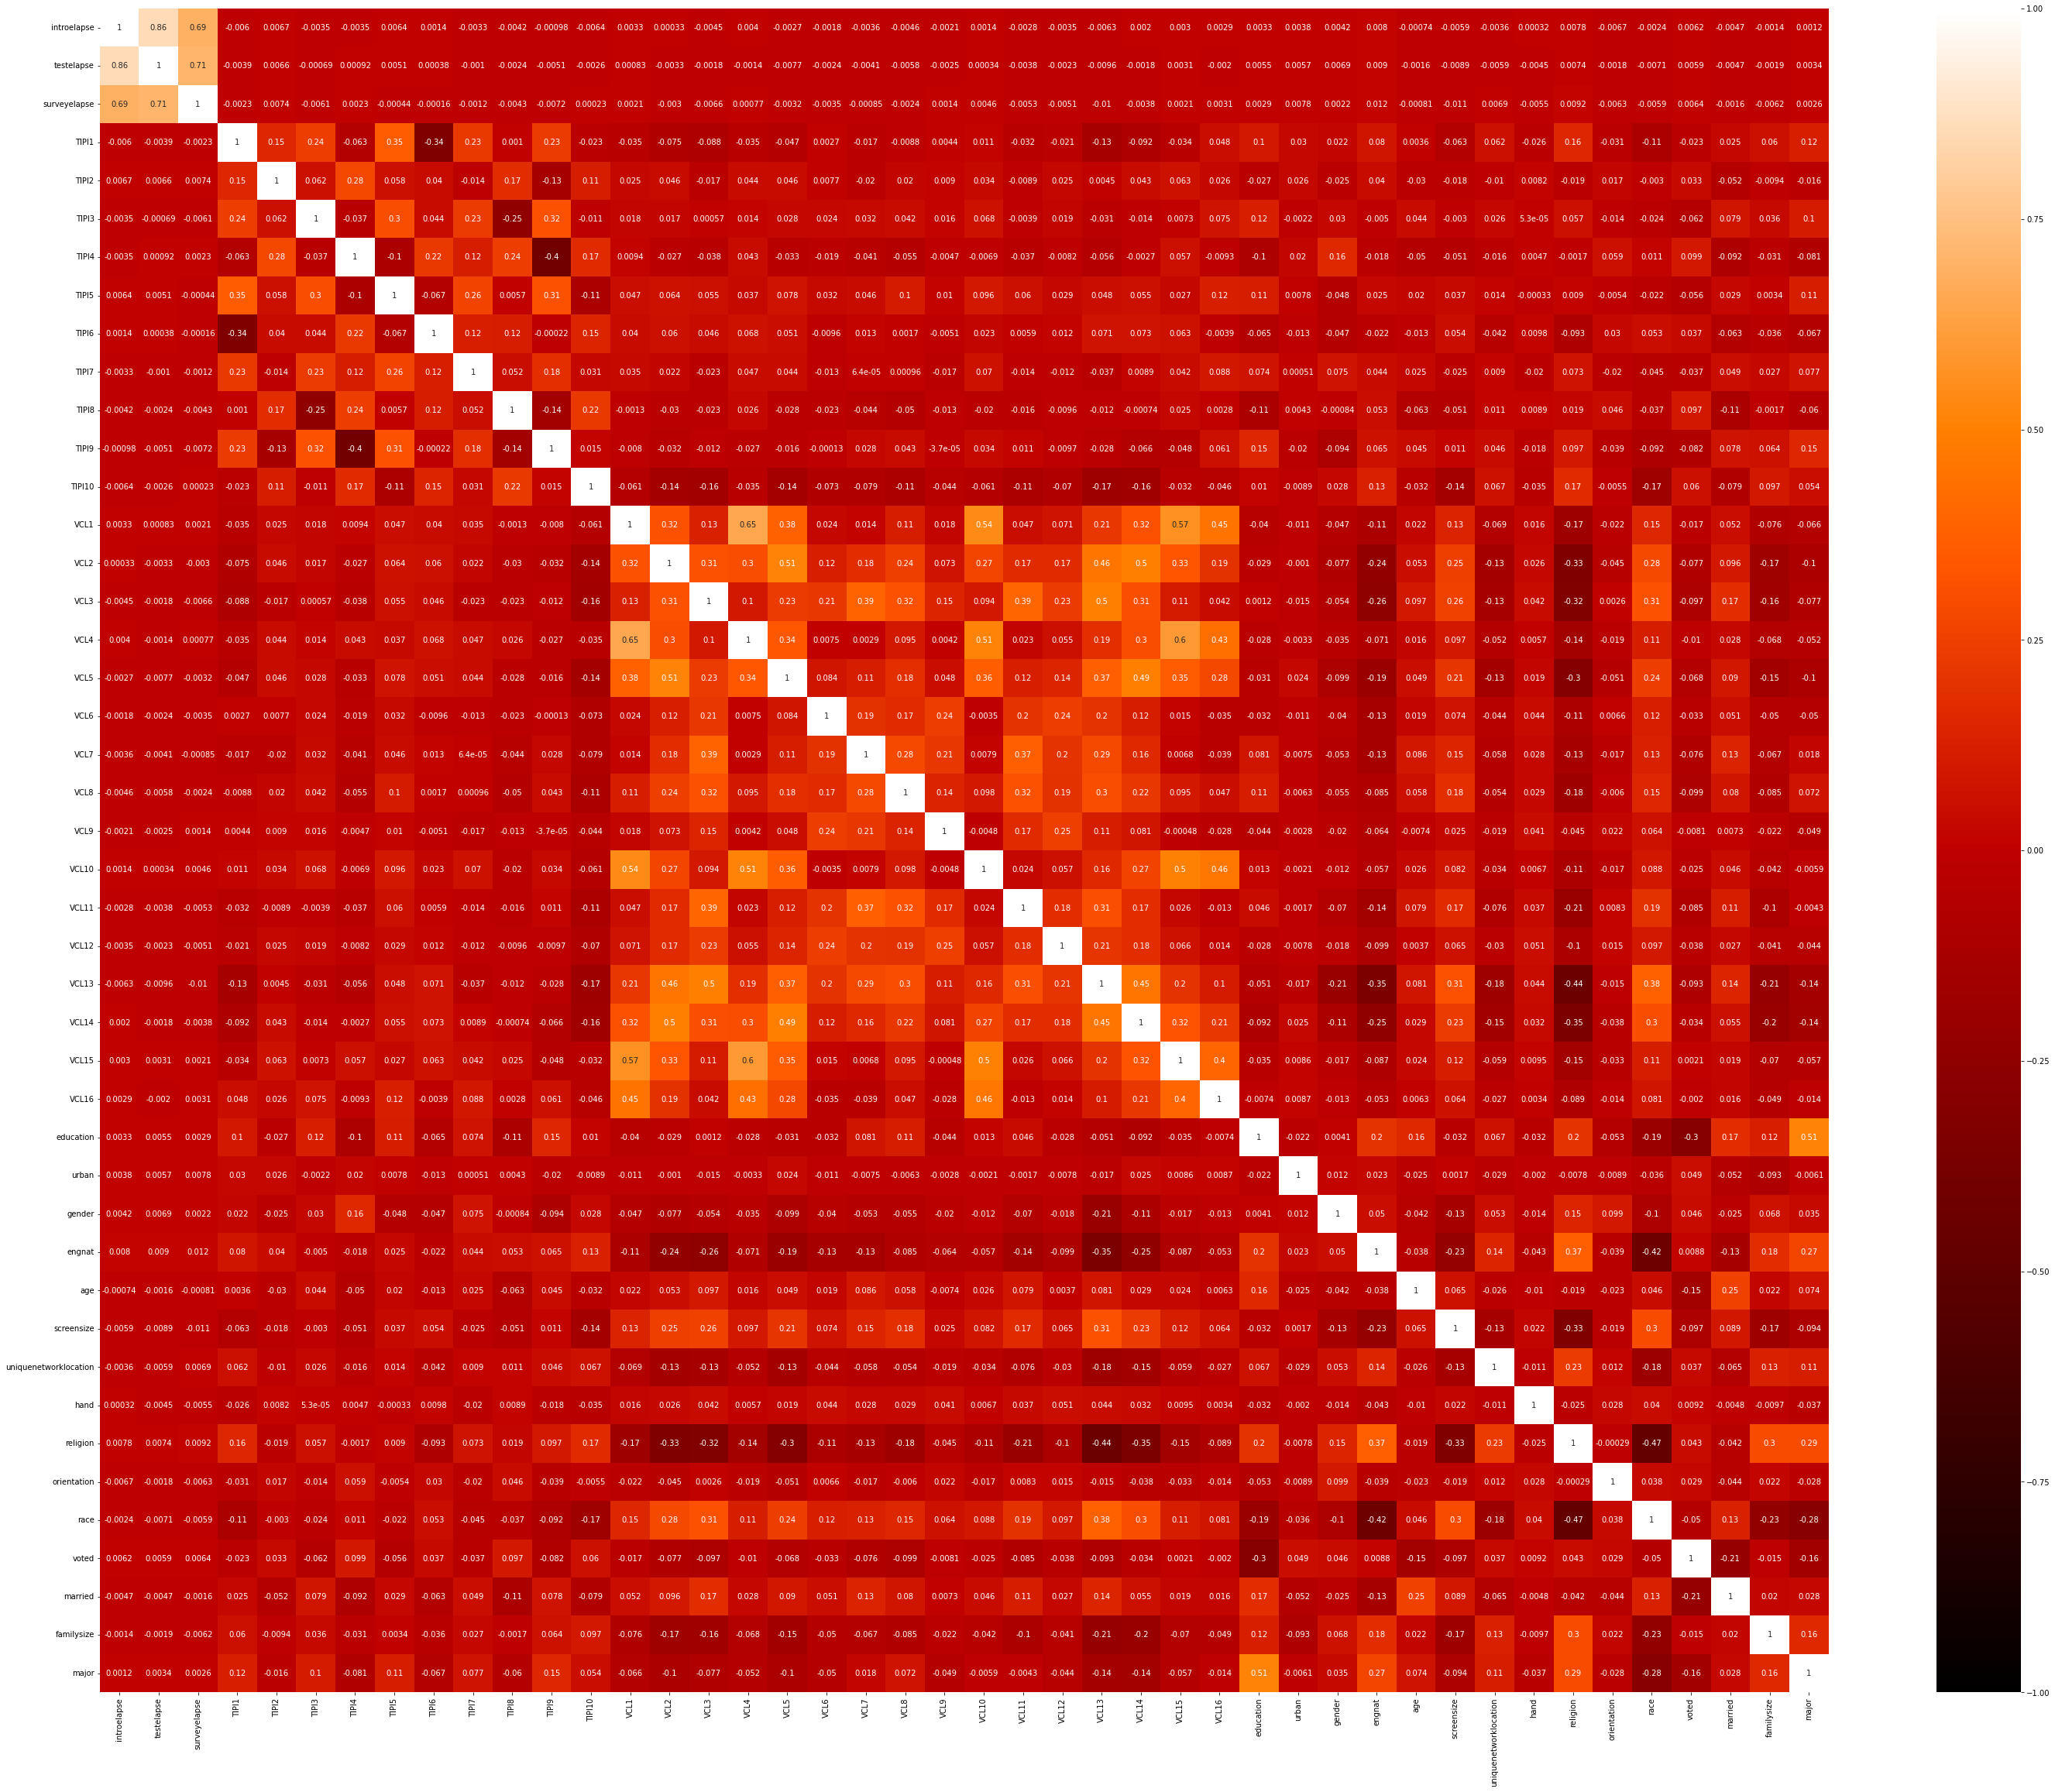

In [644]:
plt.figure(figsize=(50,40))
sns.heatmap(scaled_m_df.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')

# Correlation

<AxesSubplot:>

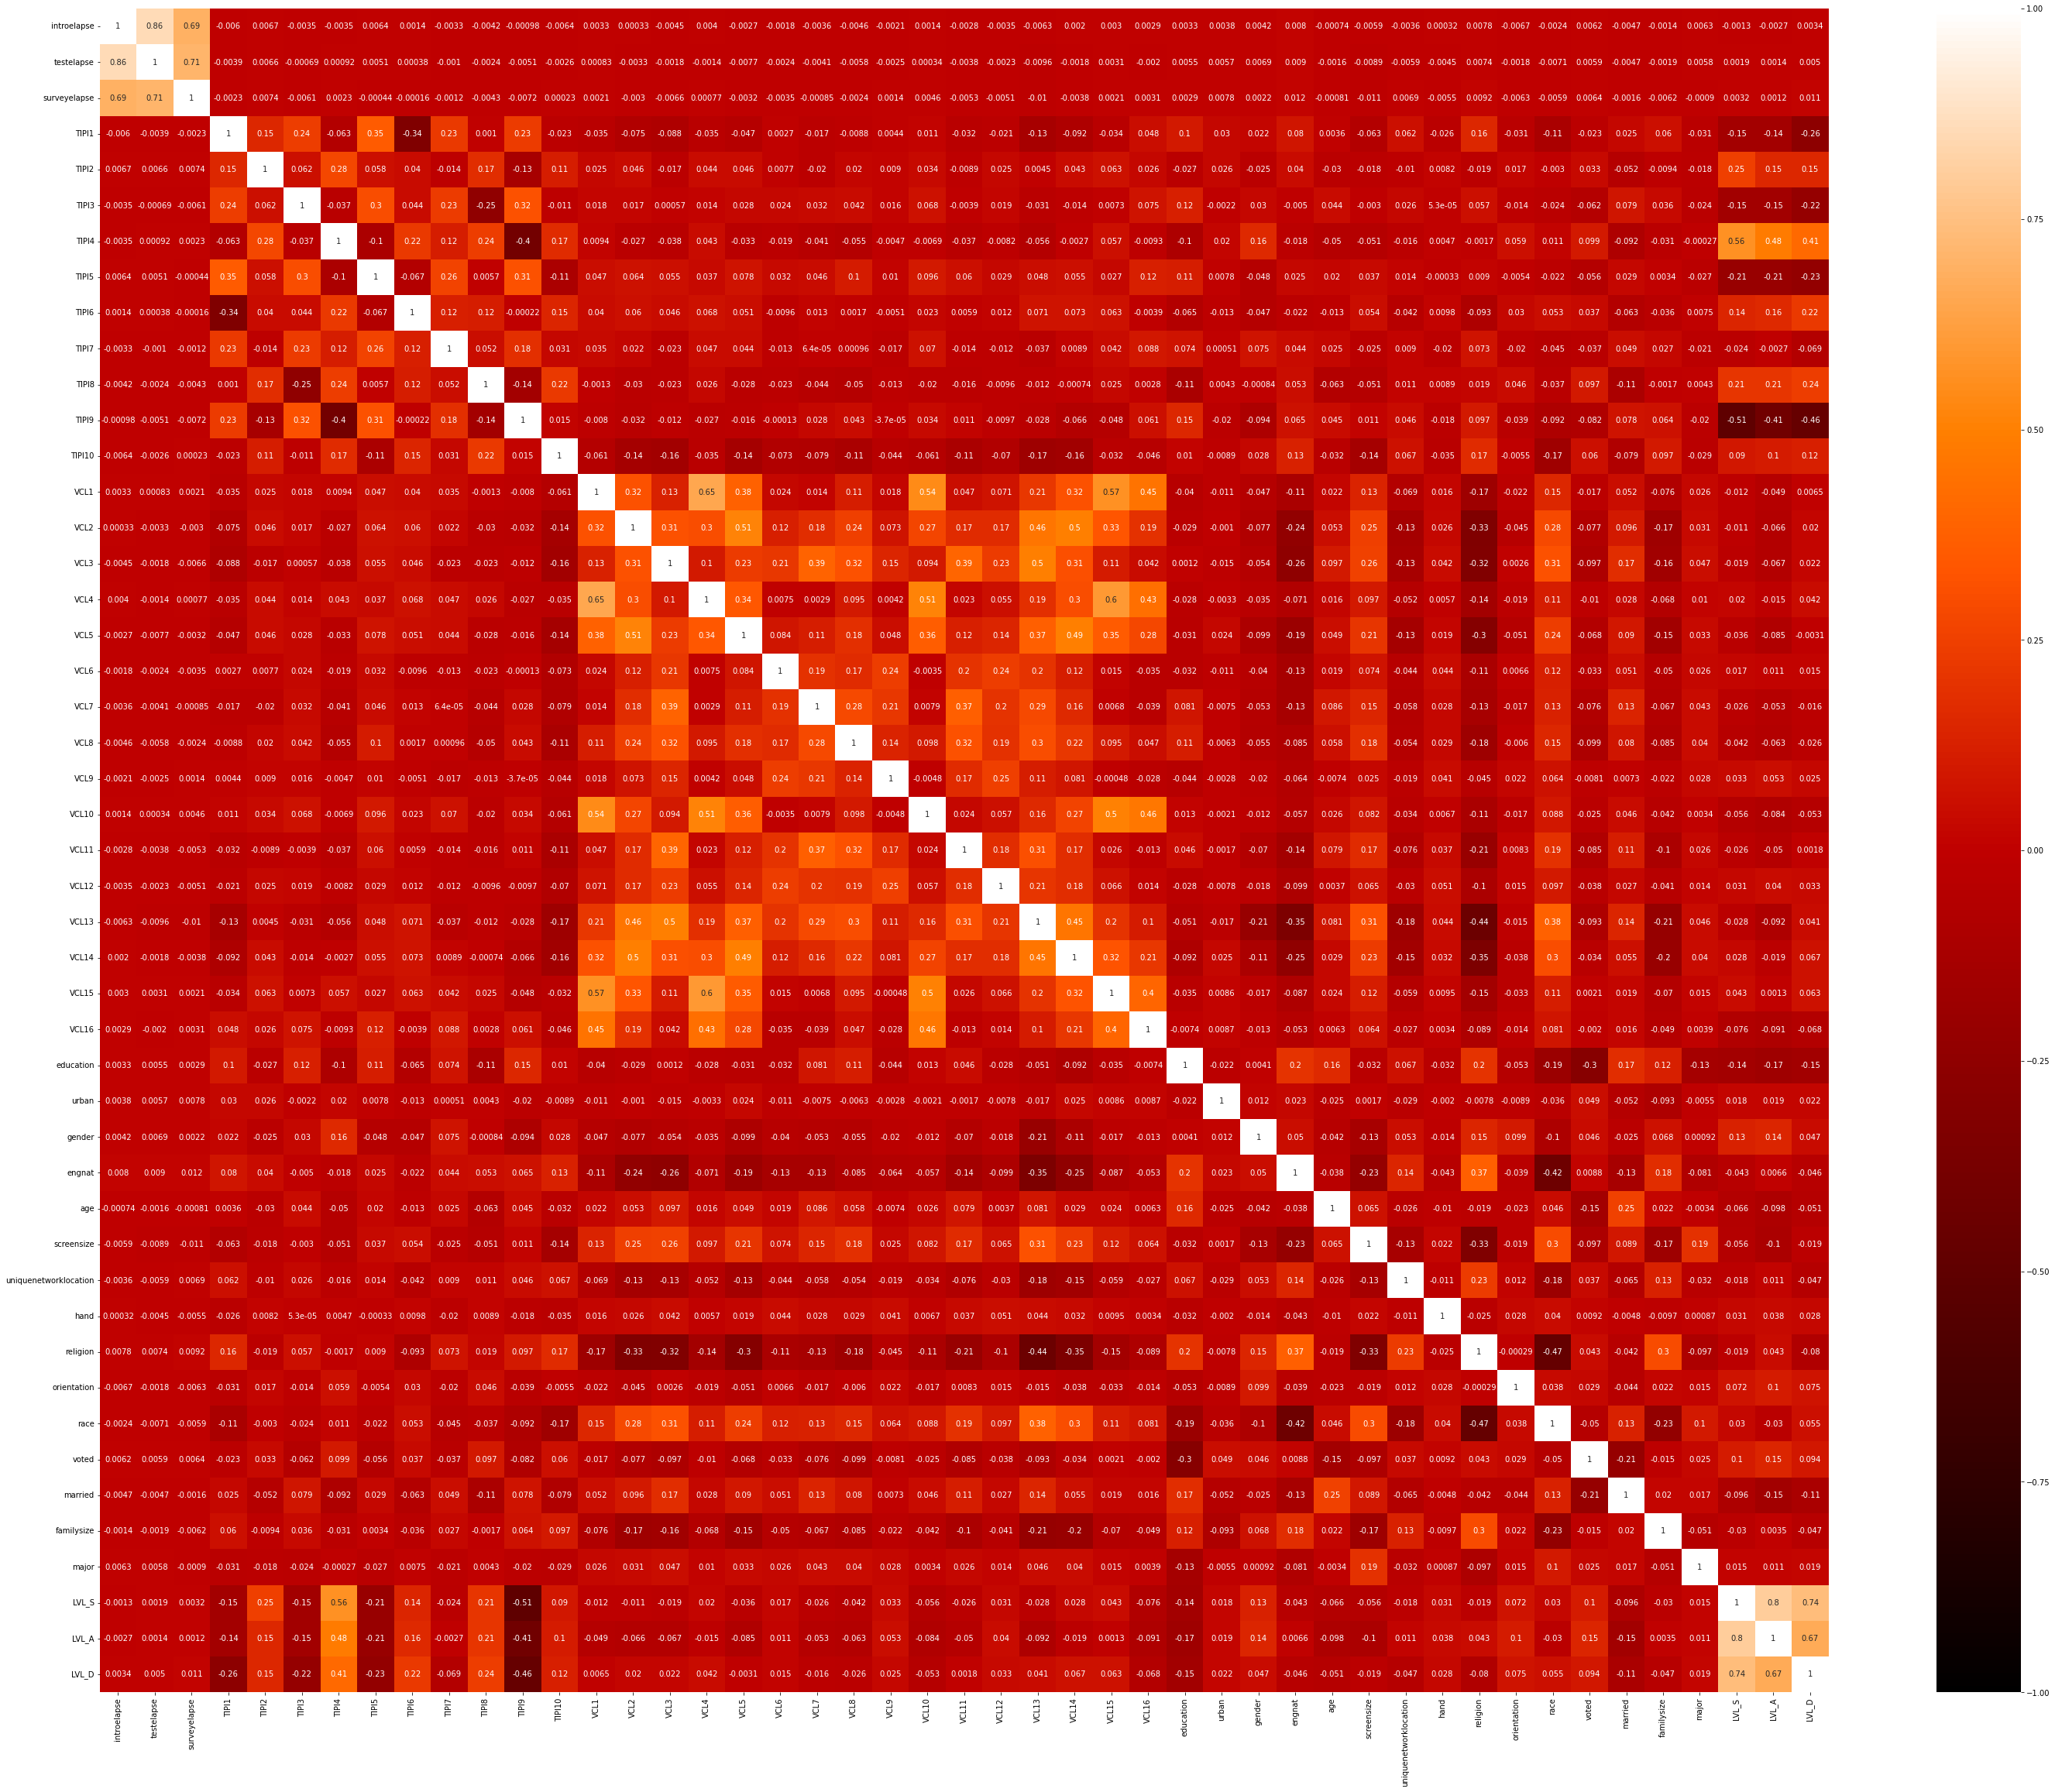

In [244]:
plt.figure(figsize=(50,40))
sns.heatmap(features_df.corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.2g')

First three time measurement is not correlated at all, so I can throw it out

In [710]:
scaled_df

TIPI1     TIPI2     TIPI3     TIPI4     TIPI5     TIPI6     TIPI7  \
0     -1.464327  0.442709  1.251894  1.001006  1.198944  1.128356  1.061947   
1      1.163591  0.442709 -0.411587  1.001006  0.038115 -0.447223  1.061947   
2     -0.938743  0.442709 -1.520574 -1.738358  0.038115  0.603163 -0.168325   
3     -1.464327 -1.751321  1.251894 -0.642612  0.618530 -0.447223  0.446811   
4     -0.938743  0.442709 -0.966081  0.453133  0.038115  0.077970 -0.168325   
...         ...       ...       ...       ...       ...       ...       ...   
39770 -0.938743 -1.202814 -0.966081 -0.094740  0.618530  0.077970 -0.168325   
39771  0.112424  0.442709  0.142907  1.001006 -0.542299  0.603163 -0.783462   
39772  1.163591  0.991216  1.251894 -0.094740  0.618530 -0.972416  0.446811   
39773 -1.464327  0.991216  0.142907  1.001006 -1.122713  0.077970 -1.398598   
39774  1.163591 -1.202814 -0.966081 -0.094740  0.618530 -0.972416 -0.168325   

          TIPI8     TIPI9    TIPI10  ...       age  screensize  \
0      0.365169 -1.447435 -1.465140  ... -0.352718   -0.615139   
1      1.380877 -1.447435  0.680751  ... -0.352718    1.625648   
2      0.365169 -0.354826 -0.928668  ... -0.306382    1.625648   
3     -1.666245  1.284086 -1.465140  ... -0.491726    1.625648   
4      0.873023 -0.354826 -0.392195  ... -0.213710    1.625648   
...         ...       ...       ...  ...       ...         ...   
39770 -0.650538 -0.354826  1.217223  ... -0.352718    1.625648   
39771  1.380877  0.191478  0.144278  ... -0.121038   -0.615139   
39772 -1.666245  0.737782  0.144278  ...  1.130037    1.625648   
39773  0.365169 -0.354826  0.144278  ... -0.167374    1.625648   
39774  0.365169 -1.447435 -0.928668  ...  0.110643   -0.615139   

       uniquenetworklocation      hand  religion  orientation      race  \
0                  -0.500039 -0.337652  1.250341    -0.475816 -0.823815   
1                  -0.500039  2.160508 -0.156386    -1.215819  1.495388   
2                  -0.500039 -0.337652 -1.000422     1.004191  1.108854   
3                  -0.500039  2.160508 -1.000422     2.484197  1.495388   
4                   1.999843  4.658668  0.687650    -0.475816 -0.823815   
...                      ...       ...       ...          ...       ...   
39770              -0.500039 -0.337652 -1.563113     1.744194  1.108854   
39771              -0.500039 -0.337652  0.687650    -1.215819 -0.823815   
39772              -0.500039 -0.337652 -0.156386    -0.475816 -0.050747   
39773              -0.500039 -0.337652 -0.437732    -0.475816  1.108854   
39774              -0.500039 -0.337652  0.687650    -0.475816 -0.823815   

          voted   married  familysize  
0      0.621495 -0.357829   -0.705242  
1      0.621495 -0.357829    0.228686  
2     -1.490962 -0.357829   -0.238278  
3      0.621495 -0.357829    0.695651  
4      0.621495 -0.357829    0.228686  
...         ...       ...         ...  
39770  0.621495 -0.357829   -0.705242  
39771  0.621495 -0.357829    0.228686  
39772 -1.490962  1.884944   -0.238278  
39773 -1.490962 -0.357829   -0.705242  
39774 -1.490962 -0.357829    0.228686  

[39775 rows x 40 columns]

In [254]:
#scaled_df = pd.DataFrame(scaled_df,scaled_df.index, scaled_df.columns[3:])

<AxesSubplot:>

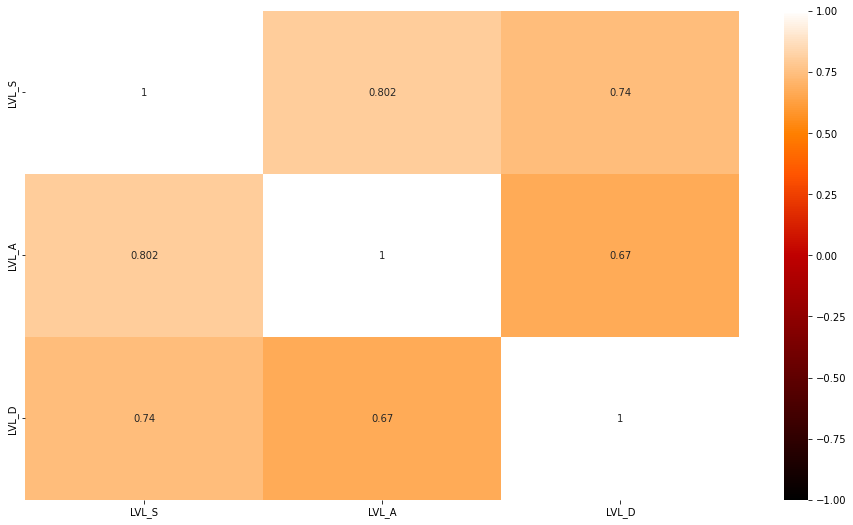

In [242]:
plt.figure(figsize=(16,9))
sns.heatmap(features_df[features_df.columns[-3:]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

<AxesSubplot:>

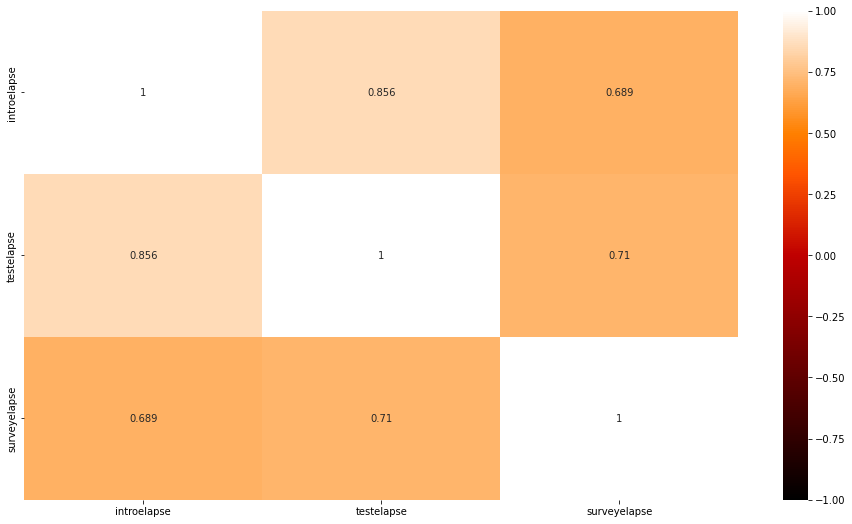

In [246]:
plt.figure(figsize=(16,9))
sns.heatmap(features_df[features_df.columns[:3]].corr(), 
            cmap='gist_heat', 
            annot=True,
            xticklabels=True,
            vmin=-1.,
           fmt='.3g')

# t-SNE

In [225]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [407]:
stress_max = target_df['LVL_S'][target_df.max(axis=1) == target_df.values[:,0]]
anx_max = target_df['LVL_A'][target_df.max(axis=1) == target_df.values[:,1]]
dep_max = target_df['LVL_D'][target_df.max(axis=1) == target_df.values[:,2]]

In [549]:
stress_max.values[:] = 1
anx_max.values[:] = 2
dep_max.values[:] = 3

In [550]:
stress_max, dep_max

(0        1
 1        1
 7        1
 10       1
 11       1
         ..
 39761    1
 39768    1
 39769    1
 39772    1
 39773    1
 Name: LVL_S, Length: 19202, dtype: int64, 2        3
 5        3
 6        3
 9        3
 12       3
         ..
 39765    3
 39767    3
 39770    3
 39771    3
 39774    3
 Name: LVL_D, Length: 18868, dtype: int64)

In [579]:
max_lvls = pd.concat((stress_max, anx_max, dep_max), join='inner', verify_integrity=False)

In [580]:
new_index = max_lvls.index[~max_lvls.index.duplicated()].unique()

In [581]:
max_lvls.index[max_lvls.index.duplicated()].unique()

Int64Index([   14,    26,    54,    59,    74,   151,   289,   296,   299,
              316,
            ...
            39545, 39625, 39628, 39638, 39669, 39678, 39691, 39731, 39735,
            39742],
           dtype='int64', length=3544)

In [582]:
target_df

LVL_S  LVL_A  LVL_D
0         54     48     41
1         41     31     38
2         31     26     53
3         30     31     30
4         43     54     46
...      ...    ...    ...
39770     29     26     50
39771     48     48     52
39772     19     15     18
39773     47     27     30
39774     30     24     41

[39775 rows x 3 columns]

In [583]:
max_lvls = max_lvls.iloc[new_index].sort_index().reset_index(drop=True)

In [584]:
#max_lvls = max_lvls.sort_index()
max_lvls.name = 'Highest Score'

In [557]:
to_pivot_scaled = features_df.join(max_lvls)

In [443]:
#pd.pivot_table(to_pivot_scaled,values='Highest Score', columns='TIPI4', index=to_pivot_scaled.index)

In [360]:
tsne = TSNE(n_components=2)

In [361]:
Scaled_TSNE = tsne.fit_transform(scaled_df)

/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/Users/barnabasp/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


KeyboardInterrupt: 

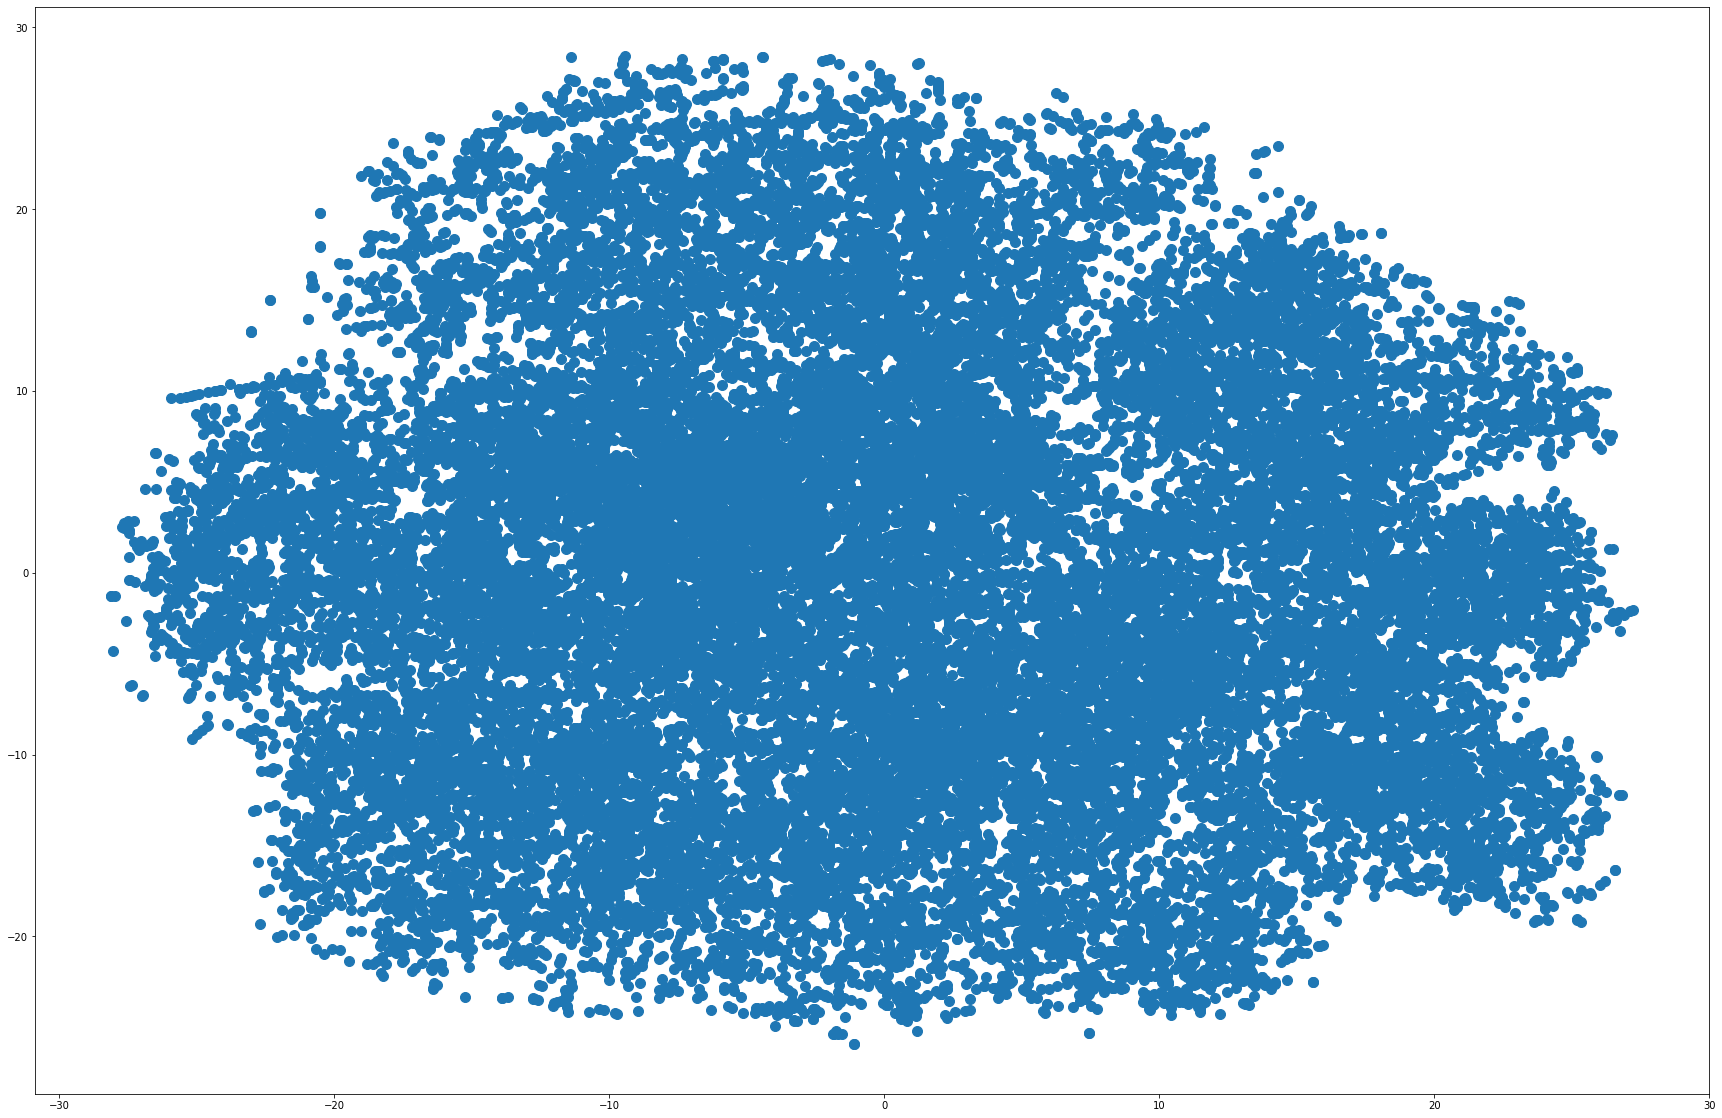

In [259]:
plt.figure(figsize=(30, 20))
plt.plot(Scaled_TSNE[:,0],Scaled_TSNE[:,1],'o', markersize=10)

# Linear Regression

In [152]:
from sklearn.linear_model import LinearRegression

In [141]:
features_df[features_df.columns[-3:]]

LVL_S  LVL_A  LVL_D
0         54     48     41
1         41     31     38
2         31     26     53
3         30     31     30
4         43     54     46
...      ...    ...    ...
39770     29     26     50
39771     48     48     52
39772     19     15     18
39773     47     27     30
39774     30     24     41

[39775 rows x 3 columns]

In [673]:
from sklearn.model_selection import train_test_split #to split up the data into training and testing
feature = features_df.columns[0:44] #select the features
X_train, X_test, y_train, y_test = train_test_split(features_df[feature],
                                                    features_df[features_df.columns[-3:]],
                                                    train_size=0.8,
                                                   random_state=727)

1.0

In [681]:
def LinReg(dataf, target, train_s=0.8, rs=None):
    X_train, X_test, y_train, y_test = train_test_split(dataf,
                                                    target,
                                                    train_size=train_s,
                                                   random_state=rs)
    reg_df = LinearRegression().fit(X_train,y_train) 
    y_pred = reg_df.predict(X_test)
    y_pred = np.round(y_pred)
    print(y_pred.shape, y_test.shape)
    print('R2: ', r2_score(y_test, y_pred))
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,
                                  sharex=True,
                                  sharey=True,
                                  figsize=(16,9))
    ax1.scatter(y_test[:,0],y_pred[:,0],marker='*')
    ax1.plot([0,60],[0,60],'r--')
    ax1.set_title('Stress')
#    ax1.set_xlabel('Real', fontsize=15)
    ax1.set_ylabel('Prediction', fontsize=15)
    ax2.scatter(y_test[:,1],y_pred[:,1],marker='o')
    ax2.plot([0,60],[0,60],'r--')
    ax2.set_xlabel('Real', fontsize=15)
    ax2.set_title('Anxiety')
#    ax2.set_ylabel('Prediction', fontsize=15)
    ax3.scatter(y_test[:,2],y_pred[:,2],marker='x')
    ax3.plot([0,60],[0,60],'r--')
    ax3.set_title('Depression')
#    ax3.set_xlabel('Real', fontsize=15)
#    ax3.set_ylabel('Prediction', fontsize=15)
    fig.suptitle('Predictions, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
    for i in range(len(dataf.columns)):
        print(dataf.columns[i], reg_df.coef_[:,i])
    return reg_df

(7955, 3) (7955, 3)
R2:  0.37321430627967783
TIPI1 [-0.35957514 -0.27978517 -1.23170881]
TIPI2 [1.03842172 0.25463611 0.60802139]
TIPI3 [-0.10968036 -0.26687418 -0.67322106]
TIPI4 [3.99339296 3.1973442  2.53182469]
TIPI5 [-0.55082518 -0.72048255 -0.56839525]
TIPI6 [0.38147014 0.72959029 1.37027267]
TIPI7 [0.14226309 0.31673863 0.02351151]
TIPI8 [0.39611325 0.59079926 1.11627509]
TIPI9 [-3.11337084 -2.25365135 -3.54817035]
TIPI10 [-0.06697506 -0.0839702   0.5346446 ]
VCL1 [-0.04833156 -0.1285075  -0.08829557]
VCL2 [-0.07557882 -0.17495563 -0.15395135]
VCL3 [-0.00893313 -0.09174491  0.12434159]
VCL4 [0.18020485 0.1543158  0.3003997 ]
VCL5 [-0.24113711 -0.31484681 -0.18722877]
VCL6 [0.20831332 0.22054086 0.16224677]
VCL7 [ 0.07780524 -0.07747925 -0.04243395]
VCL8 [0.05153555 0.13781768 0.03233747]
VCL9 [0.22607086 0.47129932 0.1484135 ]
VCL10 [-0.38028632 -0.38478909 -0.61137569]
VCL11 [-0.11947355 -0.08849683 -0.01592055]
VCL12 [0.20634321 0.43077739 0.19051026]
VCL13 [-0.15435505 -0.382

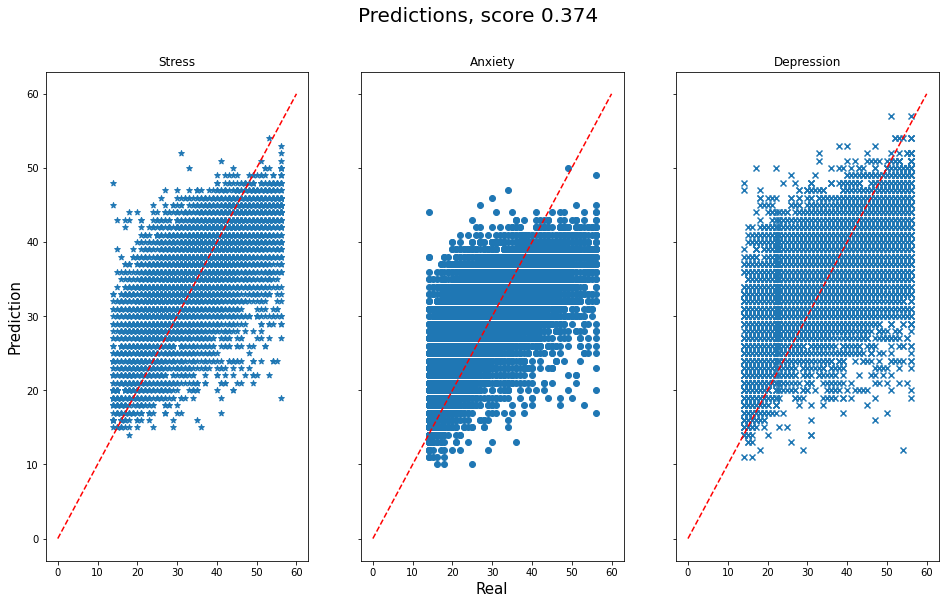

In [711]:
reg_df = LinReg(scaled_df,target_df.values,rs=727)
#reg_df = LinReg(features_df[features_df.columns[:-4]],features_df[features_df.columns[-3:]].values,rs=727)

<AxesSubplot:>

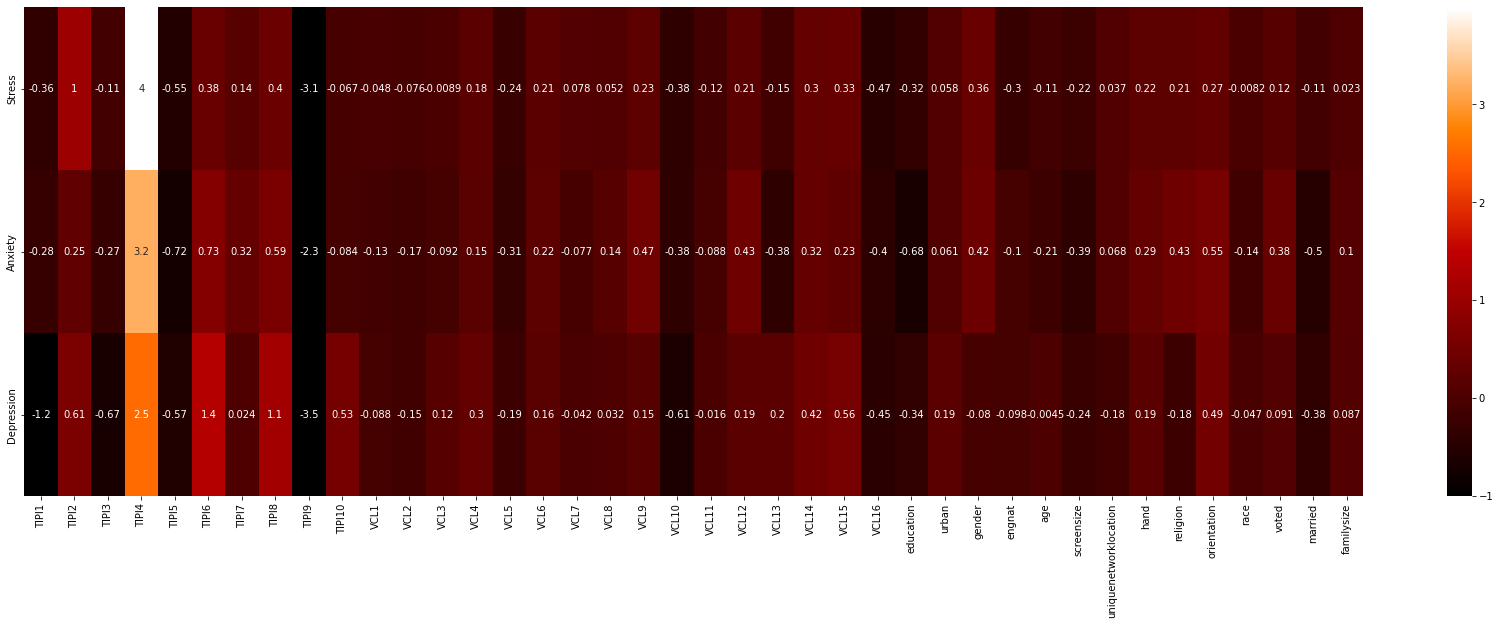

In [712]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df.coef_,xticklabels=scaled_df.columns, yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.2g')

(7955,) (7955,)
R2:  0.43270011363942396


Text(0, 0.5, 'Prediction')

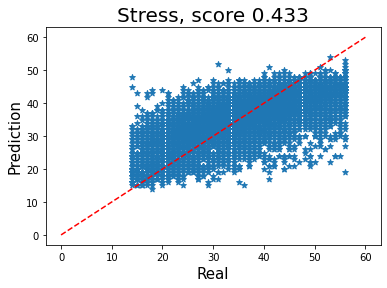

In [713]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_S'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))

plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,60],[0,60],'r--')
plt.title('Stress, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

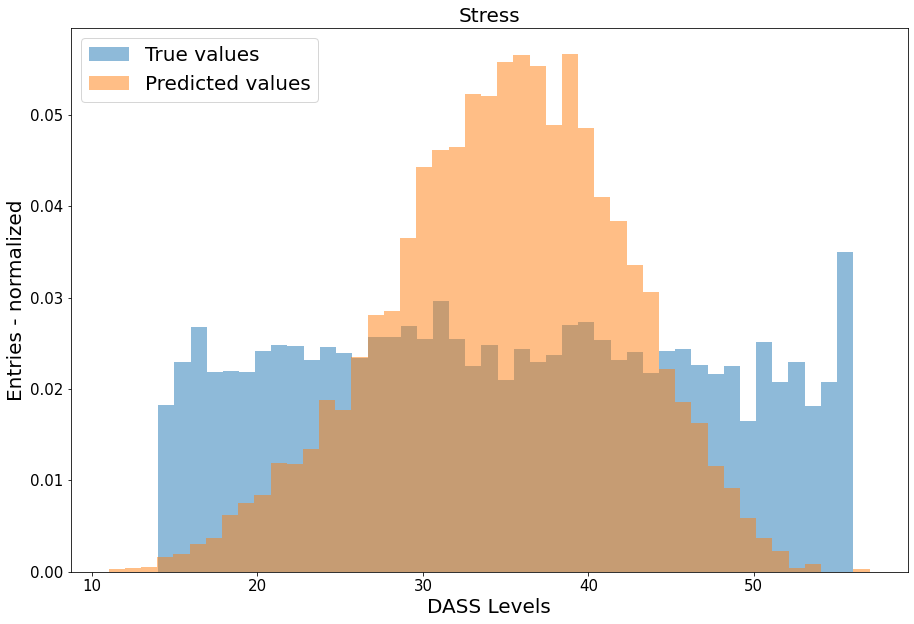

In [336]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.title('Stress', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

(7955,) (7955,)
R2:  0.342618482689549


Text(0, 0.5, 'Prediction')

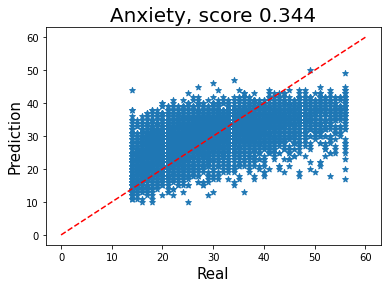

In [684]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_A'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,60],[0,60],'r--')
plt.title('Anxiety, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)

Text(0.5, 1.0, 'Anxiety')

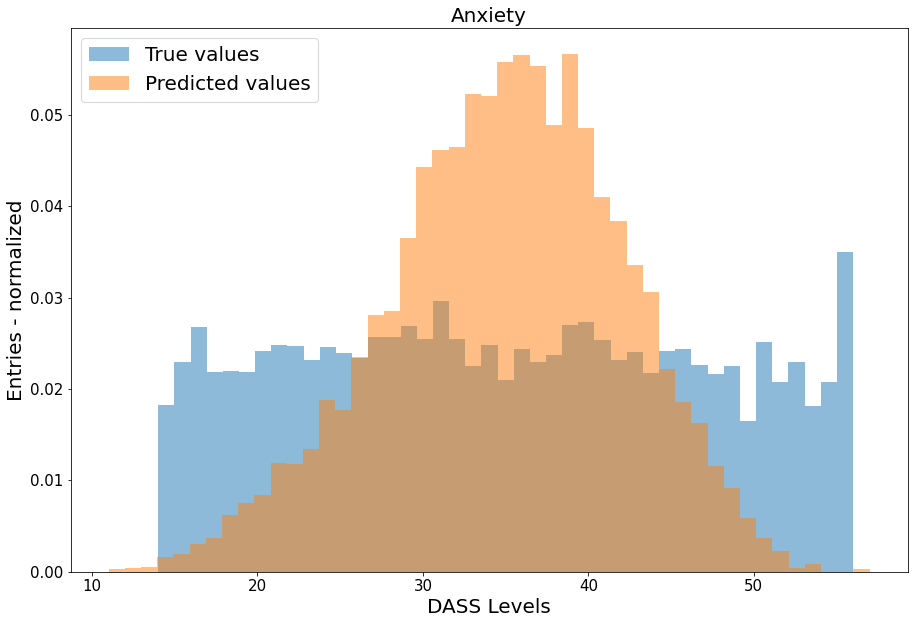

In [337]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Anxiety', fontsize=20)

(7955,) (7955,)
R2:  0.3440825152843979


(5.0, 60.0)

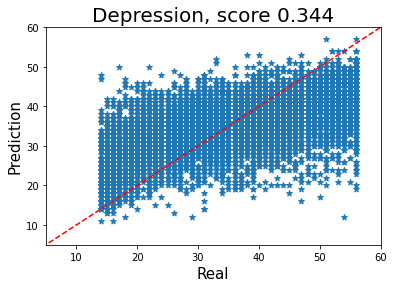

In [685]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                target_df['LVL_D'].values,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
plt.plot([0,60],[0,60],'r--')
plt.title('Depression, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)
plt.xlim(5,60)
plt.ylim(5,60)

Text(0.5, 1.0, 'Depression')

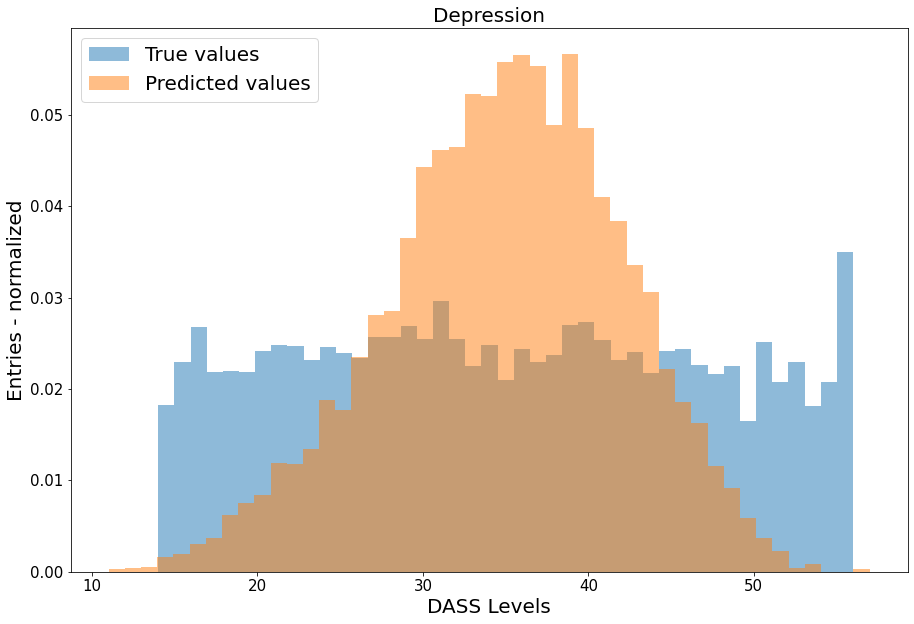

In [338]:
plt.figure(figsize=(15,10))
_ = plt.hist(y_test, density=True, alpha=0.5, label='True values', bins=43)
pred_cnt, pred_bin, _ = plt.hist(y_pred, density=True, alpha=0.5, label='Predicted values', bins=47)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('DASS Levels', fontsize=20)
plt.ylabel('Entries - normalized', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Depression', fontsize=20)

## Let's see without any questions, purely based on demographics

(7955, 3) (7955, 3)
R2:  0.05574812180890768
education [-1.03792099 -1.33318365 -1.21879388]
urban [0.15863436 0.11740193 0.22130004]
gender [1.27134683 1.17588652 0.5526329 ]
engnat [-0.3408905  -0.09551791 -0.1139069 ]
age [-0.1573356  -0.26262874 -0.03460526]
screensize [-0.53836266 -0.68976014 -0.47401381]
uniquenetworklocation [-0.16375064 -0.08061534 -0.43959246]
hand [0.3012156  0.3701498  0.29956061]
religion [-0.07186068  0.31074944 -0.76238678]
orientation [0.49506286 0.75878175 0.72693488]
race [0.27058439 0.02255384 0.28695712]
voted [0.55661968 0.73639283 0.54340249]
married [-0.66635325 -0.99733603 -1.00782258]
familysize [-0.14062201 -0.00525494 -0.08886994]


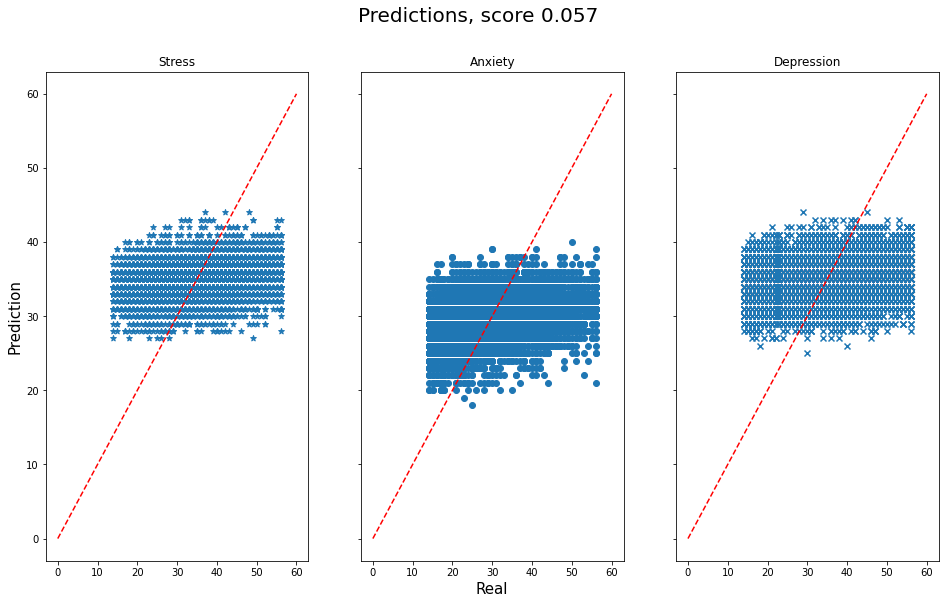

In [686]:
reg_df41 = LinReg(scaled_df[scaled_df.columns[-14:]],target_df.values,rs=727)

<AxesSubplot:>

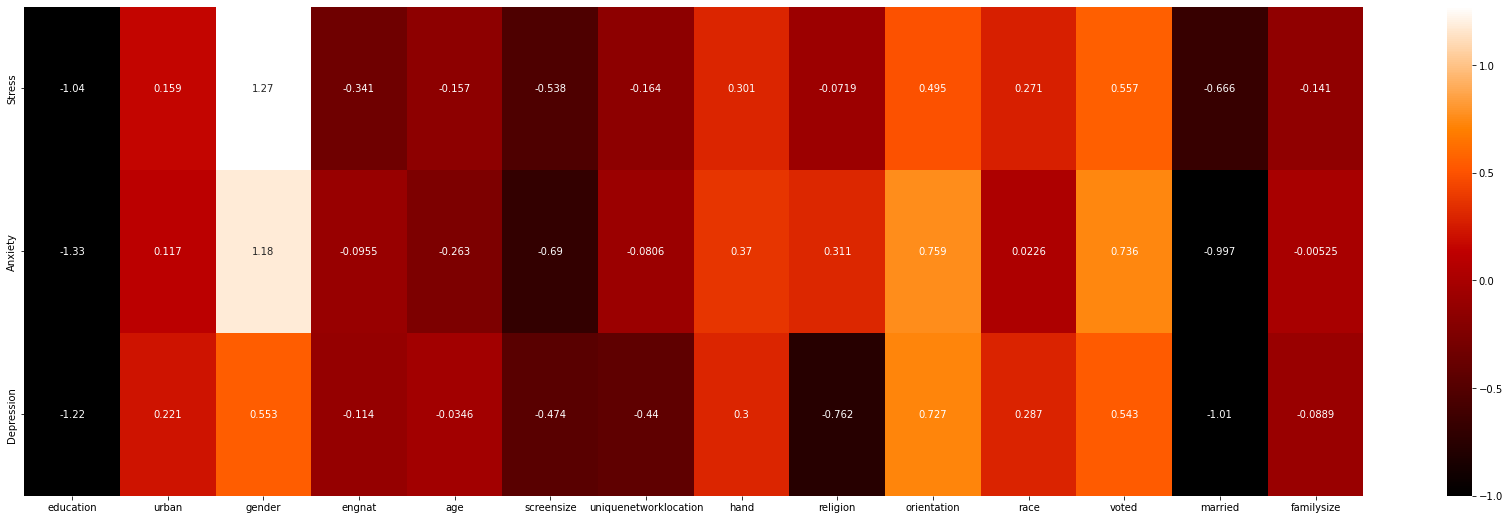

In [275]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df41.coef_,xticklabels=scaled_df.columns[-14:], yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.3g')

## Only questions

(7955, 3) (7955, 3)
R2:  0.3641100339494381
introelapse [-0.02704091 -0.06433604 -0.01461572]
testelapse [ 0.00614429  0.05254555 -0.0815381 ]
surveyelapse [ 0.01150688 -0.01024124  0.17920552]
TIPI1 [-0.36912299 -0.29154279 -1.26212791]
TIPI2 [1.00620494 0.24082075 0.62948686]
TIPI3 [-0.09228278 -0.28692619 -0.70122253]
TIPI4 [4.10623892 3.36201649 2.58722884]
TIPI5 [-0.58473428 -0.74570632 -0.56356166]
TIPI6 [0.35955224 0.73407671 1.42763951]
TIPI7 [ 0.13745349  0.28067934 -0.04184768]
TIPI8 [0.45027848 0.74622437 1.19638546]
TIPI9 [-3.17374016 -2.34556809 -3.60769106]
TIPI10 [-0.08043235 -0.06216919  0.50551553]
VCL1 [-0.04970239 -0.15217344 -0.08367617]
VCL2 [-0.09540486 -0.27394461 -0.1831112 ]
VCL3 [-0.02006765 -0.2308716   0.08333187]
VCL4 [0.16609883 0.14837175 0.29904912]
VCL5 [-0.29554725 -0.44858035 -0.19978215]
VCL6 [0.23429971 0.24702199 0.18875723]
VCL7 [ 0.03180466 -0.18656119 -0.12169555]
VCL8 [-0.02076046  0.01680842 -0.0300033 ]
VCL9 [0.27831464 0.58623212 0.19937153]

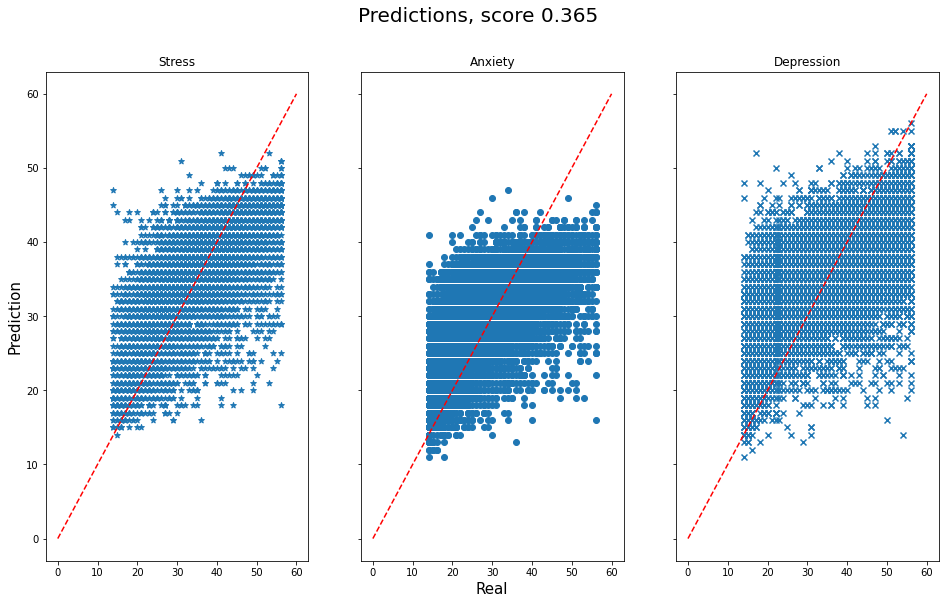

In [687]:
reg_df42 = LinReg(scaled_df[scaled_df.columns[:-14]],target_df.values,rs=727)

<AxesSubplot:>

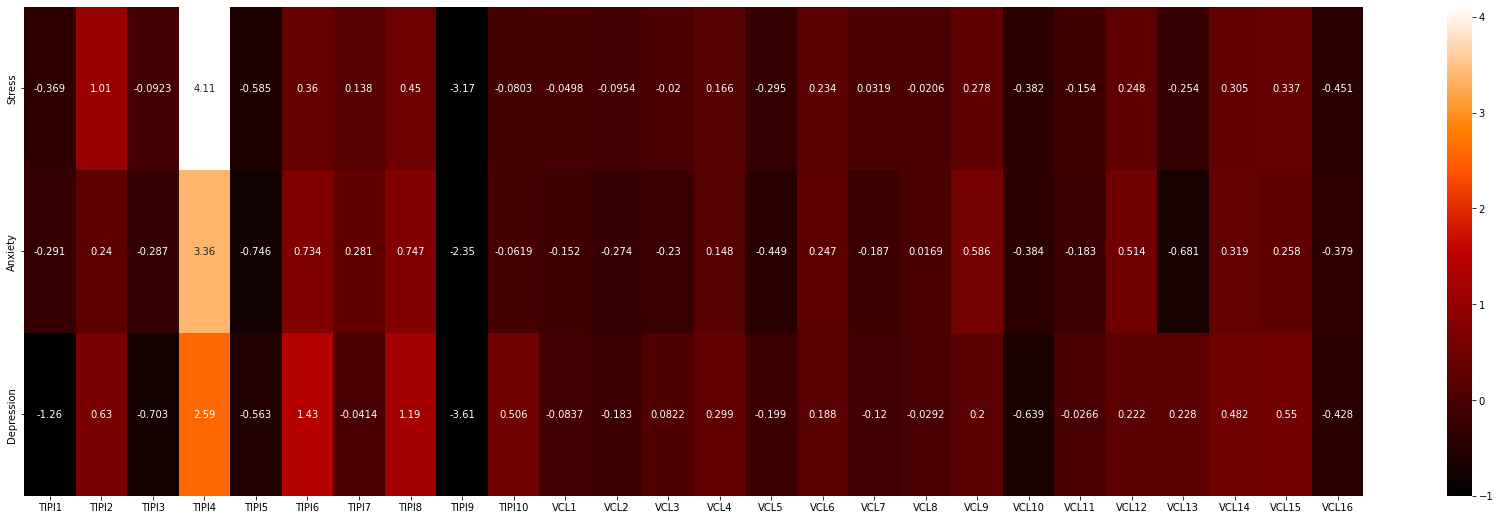

In [303]:
plt.figure(figsize=(30,9))
sns.heatmap(reg_df41.coef_,xticklabels=scaled_df.columns[:-14], yticklabels=['Stress', 'Anxiety', 'Depression'],             cmap='gist_heat', 
            annot=True,
            vmin=-1.,
           fmt='.3g')

## Largest values

(7955,) (7955,)
R2:  0.002642200477419032


Text(0, 0.5, 'Prediction')

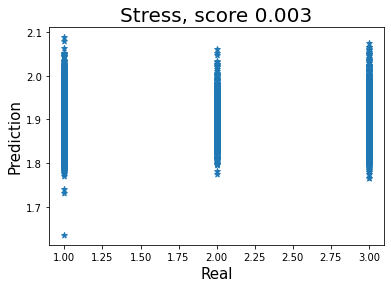

In [689]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                max_lvls,
                                                train_size=0.8,
                                               random_state=727)
reg_df = LinearRegression().fit(X_train,y_train) 
y_pred = reg_df.predict(X_test)
#y_pred = np.round(y_pred)
print(y_pred.shape, y_test.shape)
print('R2: ', r2_score(y_test, y_pred))
plt.scatter(y_test,y_pred,marker='*')
#plt.plot([0,60],[0,60],'r--')
plt.title('Stress, score %5.3f' % reg_df.score(X_test, y_test), fontsize=20)
plt.xlabel('Real', fontsize=15)
plt.ylabel('Prediction', fontsize=15)


## Major added

(7955, 3) (7955, 3)
R2:  0.3736291627248936
introelapse [-0.03197122 -0.07305908 -0.00667214]
testelapse [ 0.00846705  0.05498966 -0.09358444]
surveyelapse [ 0.01498411 -0.00566292  0.18734126]
TIPI1 [-0.35786682 -0.27766934 -1.22683992]
TIPI2 [1.03869593 0.25520078 0.60738091]
TIPI3 [-0.10740148 -0.2642     -0.66599532]
TIPI4 [3.99142787 3.19462891 2.52766673]
TIPI5 [-0.54468232 -0.71209069 -0.5551764 ]
TIPI6 [0.37986174 0.72746834 1.36634506]
TIPI7 [0.14449439 0.31974802 0.02849017]
TIPI8 [0.39396817 0.58762567 1.11298051]
TIPI9 [-3.10809627 -2.24650751 -3.53532668]
TIPI10 [-0.06448251 -0.08072621  0.5408108 ]
VCL1 [-0.04991003 -0.13054815 -0.09238335]
VCL2 [-0.07468736 -0.17379559 -0.15198805]
VCL3 [-0.00764576 -0.09044604  0.1285542 ]
VCL4 [0.17975758 0.15394462 0.29913405]
VCL5 [-0.24472481 -0.31941761 -0.19590818]
VCL6 [0.20736846 0.21925587 0.16021649]
VCL7 [ 0.07867297 -0.0760914  -0.04150279]
VCL8 [0.06335109 0.15377204 0.05911622]
VCL9 [0.22252336 0.466698   0.13943094]
VCL10

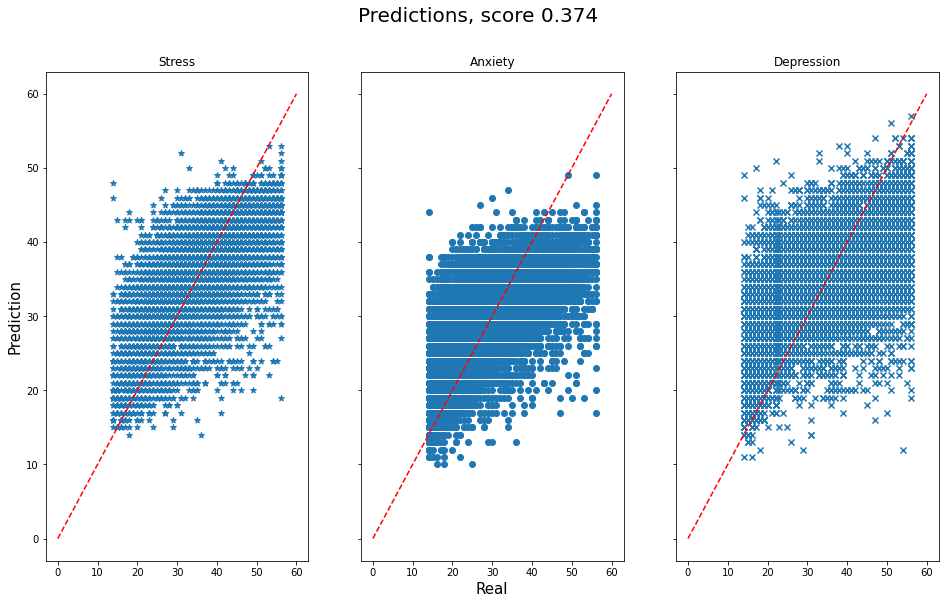

In [690]:
reg_df44 = LinReg(scaled_m_df,target_df.values,rs=727)

# Elastic, Ridge and CV

# Decision Tree

In [694]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [718]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,
                                                max_lvls,
                                                train_size=0.8,
                                               random_state=727)

## Classify

In [714]:
dtc = DecisionTreeClassifier(random_state=727)
dtc.fit(scaled_df, max_lvls)

DecisionTreeClassifier(random_state=727)

In [715]:
dtc.feature_importances_

array([0.05031745, 0.05672377, 0.05223167, 0.03391619, 0.05316689,
       0.04726687, 0.0459031 , 0.04879953, 0.05082083, 0.05610701,
       0.00910993, 0.01432016, 0.00711865, 0.00694619, 0.01394725,
       0.00468703, 0.00529773, 0.00527756, 0.00272011, 0.00828685,
       0.00526762, 0.00932193, 0.01167045, 0.01357198, 0.00799945,
       0.00618562, 0.02852976, 0.0282782 , 0.01641536, 0.01524998,
       0.0899281 , 0.01411383, 0.01160631, 0.01390814, 0.02968868,
       0.0388291 , 0.00533991, 0.01410869, 0.0082353 , 0.05878682])

In [716]:
importances = pd.DataFrame(data=[dtc.feature_importances_], columns=scaled_df.columns)
importances = importances.T.sort_values(by=[0],ascending=False).T
importances

age  familysize     TIPI2    TIPI10     TIPI5     TIPI3     TIPI9  \
0  0.089928    0.058787  0.056724  0.056107  0.053167  0.052232  0.050821   

      TIPI1   TIPI8     TIPI6  ...     VCL15      VCL3      VCL4     VCL16  \
0  0.050317  0.0488  0.047267  ...  0.007999  0.007119  0.006946  0.006186   

      race      VCL7      VCL8     VCL11      VCL6     VCL9  
0  0.00534  0.005298  0.005278  0.005268  0.004687  0.00272  

[1 rows x 40 columns]

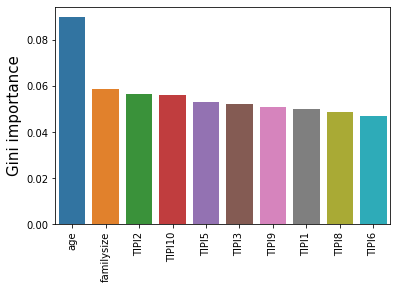

In [717]:
ax = sns.barplot(x=np.arange(0,len(importances.iloc[0][:10]),1),y=importances.iloc[0][:10])
ax.set_ylabel(ylabel='Gini importance', fontsize=15)
ax.set_xticklabels(importances.columns[:10], rotation=90, fontsize=10)
plt.show()

In [719]:
dtc = DecisionTreeClassifier(random_state=727)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=727)

In [725]:
y_preddtc = dtc.predict(X_test)

In [728]:
confusion_matrix(y_test, y_preddtc)

array([[1811,  634, 1407],
       [ 535,  190,  431],
       [1402,  449, 1096]])

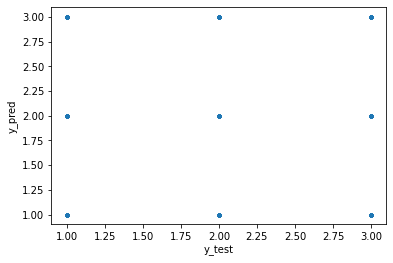

In [726]:
plt.plot(y_test, y_preddtc, ".")
plt.xlabel("y_test")
plt.ylabel("y_pred");

## Regress

# K-nn 

In [278]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [662]:
def doKnn(data, target, ts, rs=None):
    X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    train_size=ts,
                                                   random_state=rs)
    knn= KNeighborsRegressor(20, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_test)
    print("Accuracy of built-in KNN regression: ", sum(np.around(y_pred1)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred1))
    plt.plot(y_test, y_pred1, ".")
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    knn= KNeighborsRegressor(20, weights="distance")
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    print("Accuracy of built-in weighted KNN regression: ", sum(np.around(y_pred2)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred2))
    plt.plot(y_test, y_pred2, ".")
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    knn= KNeighborsClassifier(20, weights="uniform")
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    print("Accuracy of built-in KNN classifier: ", sum(np.around(y_pred3)==y_test)/len(y_test))
    print('R2 score: ', r2_score(y_test, y_pred3))
    plt.plot(y_test, y_pred3, ".", ms=15, alpha=0.2)
    plt.xlabel("y_test")
    plt.ylabel("y_pred");
    #plt.plot([0,60],[0,60],'r--')
    #plt.xlim(5,60)
    #plt.ylim(5,60)
    plt.show()
    return y_test, X_test, y_pred1, y_pred2, y_pred3

## Define the highest level

Accuracy of built-in KNN regression:  0.15235700817096165
R2 score:  -0.04766916400617105


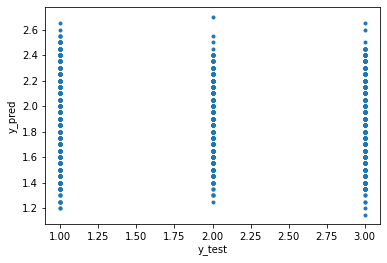

Accuracy of built-in weighted KNN regression:  0.15461973601508486
R2 score:  -0.047613692181945


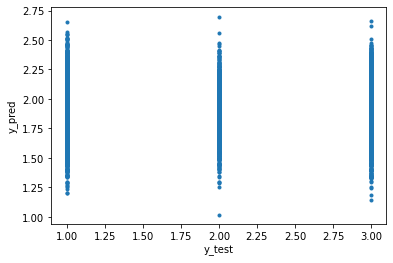

Accuracy of built-in KNN classifier:  0.46184789440603397
R2 score:  -1.0246286539025458


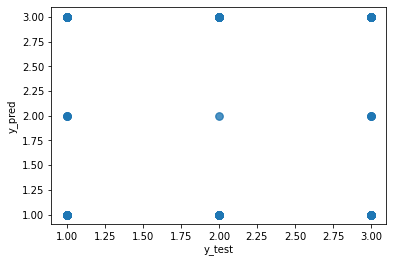

In [663]:
y_test71, x_test71, y_pred711, y_pred712, y_pred713 = doKnn(scaled_df, max_lvls, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

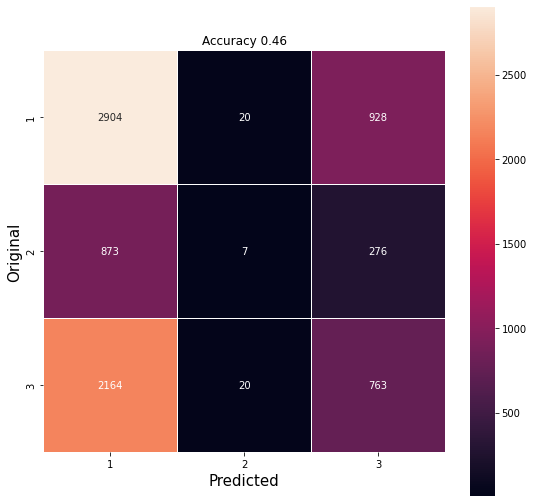

In [664]:
cm = confusion_matrix(y_test, y_pred713)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred713)),
            yticklabels=np.unique(np.round(y_pred713)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred713)==y_test)/len(y_test)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

## Level of Stress

Accuracy of built-in KNN regression:  0.04852294154619736
R2 score:  0.34738050352469374


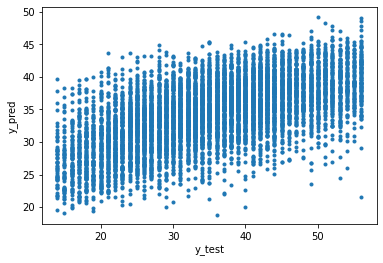

Accuracy of built-in weighted KNN regression:  0.048271527341294786
R2 score:  0.3474060610962231


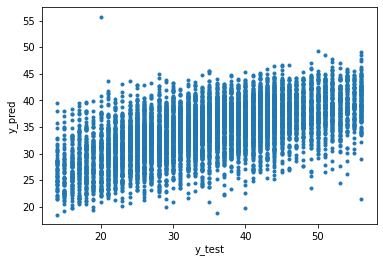

Accuracy of built-in KNN classifier:  0.03871778755499686
R2 score:  -0.1442939350036767


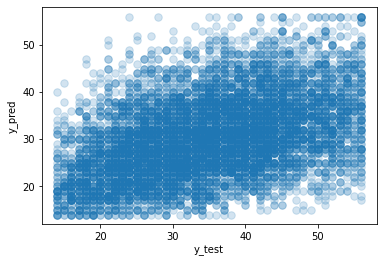

In [665]:
y_test72, x_test72, y_pred721, y_pred722, y_pred723 =doKnn(scaled_df, target_df['LVL_S'], ts=0.8, rs=727)

### One v. all

In [651]:
max_stress = max_lvls.copy()
max_stress[max_lvls > 1] = 0

Accuracy of built-in KNN regression:  0.5005656819610308
R2 score:  -0.05167050744092516


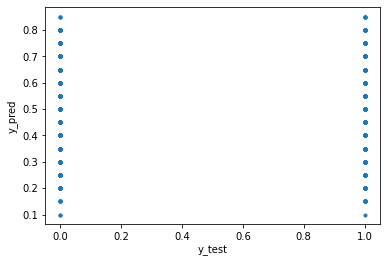

Accuracy of built-in weighted KNN regression:  0.49981143934632305
R2 score:  -0.052048383342160776


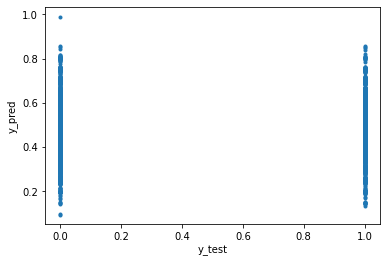

Accuracy of built-in KNN classifier:  0.5005656819610308
R2 score:  -0.9997281198140611


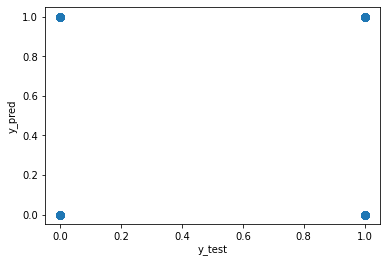

In [666]:
y_test721, x_test721, y_pred7211, y_pred7212, y_pred7213 = doKnn(scaled_df, max_stress, ts=0.8, rs=727)

## Level of Anxiety

Accuracy of built-in KNN regression:  0.04424890006285355
R2 score:  0.2768259823108755


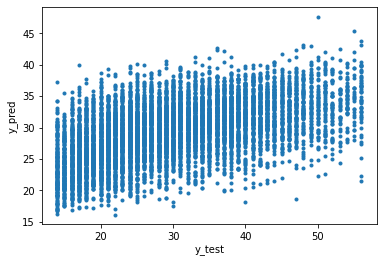

Accuracy of built-in weighted KNN regression:  0.043871778755499684
R2 score:  0.27633674633779126


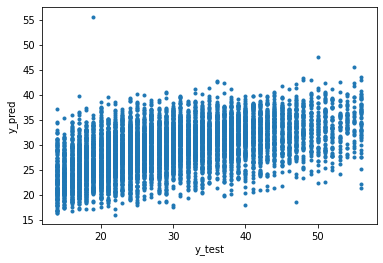

Accuracy of built-in KNN classifier:  0.04600879949717159
R2 score:  -0.278882882350614


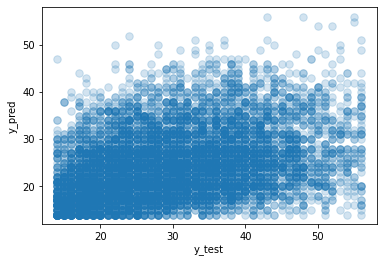

In [667]:
y_test73, x_test73, y_pred731, y_pred732, y_pred733 =doKnn(scaled_df, target_df['LVL_A'], ts=0.8, rs=727)

### One v. all

Accuracy of built-in KNN regression:  0.8060339409176619
R2 score:  -0.05303009430198102


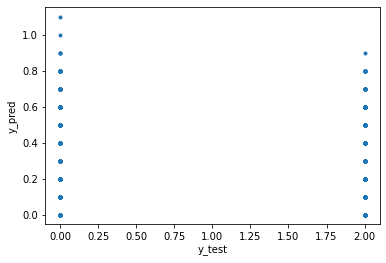

Accuracy of built-in weighted KNN regression:  0.7689503456945317
R2 score:  -0.0537154108526956


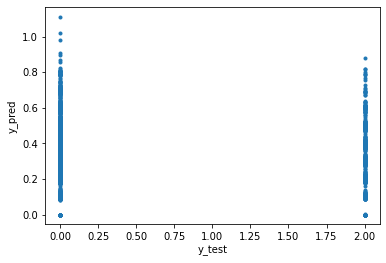

Accuracy of built-in KNN classifier:  0.8545568824638592
R2 score:  -0.1710371360331333


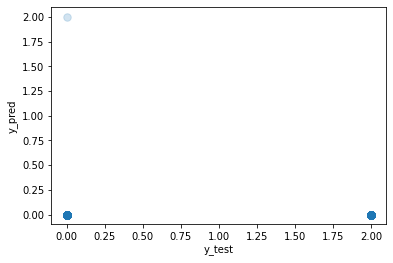

In [668]:
max_anx = max_lvls.copy()
max_anx[max_lvls != 2] = 0

y_test731, x_test731, y_pred7311, y_pred7312, y_pred7313 = doKnn(scaled_df, max_anx, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

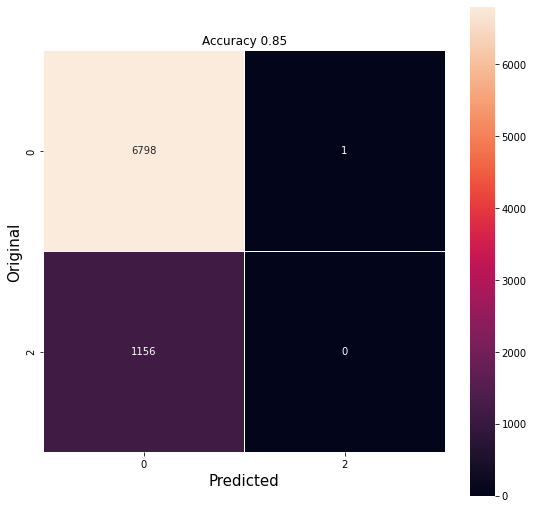

In [669]:
cm = confusion_matrix(y_test731, y_pred7313)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred7313)),
            yticklabels=np.unique(np.round(y_pred7313)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred7313)==y_test731)/len(y_test731)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

## Level of Depression

Accuracy of built-in KNN regression:  0.02690131992457574
R2 score:  0.28053757224675546


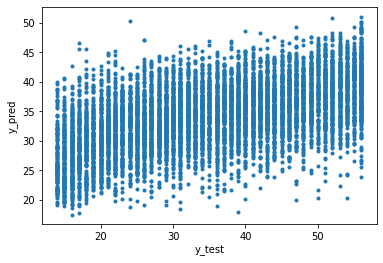

Accuracy of built-in weighted KNN regression:  0.026147077309868007
R2 score:  0.2805976885987519


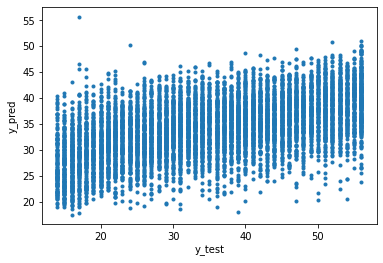

Accuracy of built-in KNN classifier:  0.03846637335009428
R2 score:  -0.3599982011986158


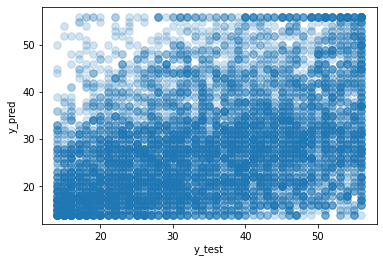

In [670]:
y_test74, x_test74, y_pred741, y_pred742, y_pred743=doKnn(scaled_df, target_df['LVL_D'], ts=0.8, rs=727)

### One v. all

Accuracy of built-in KNN regression:  0.018101822752985542
R2 score:  -0.04481165560959255


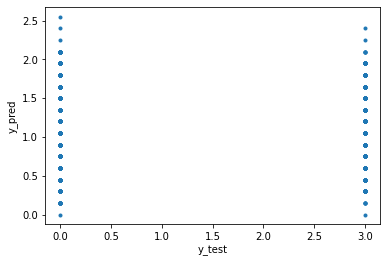

Accuracy of built-in weighted KNN regression:  0.018227529855436832
R2 score:  -0.044489370197735134


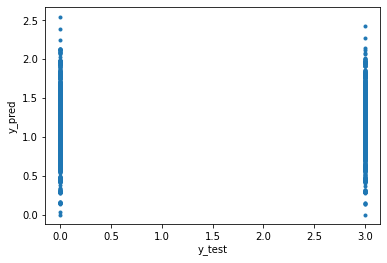

Accuracy of built-in KNN classifier:  0.6096794468887492
R2 score:  -0.6736218318081635


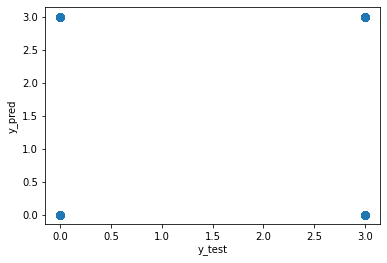

In [671]:
max_depr = max_lvls.copy()
max_depr[max_lvls != 3] = 0

y_test741, x_test741, y_pred7411, y_pred7412, y_pred7413 = doKnn(scaled_df, max_depr, ts=0.8, rs=727)

Text(0.5, 103.73999999999997, 'Predicted')

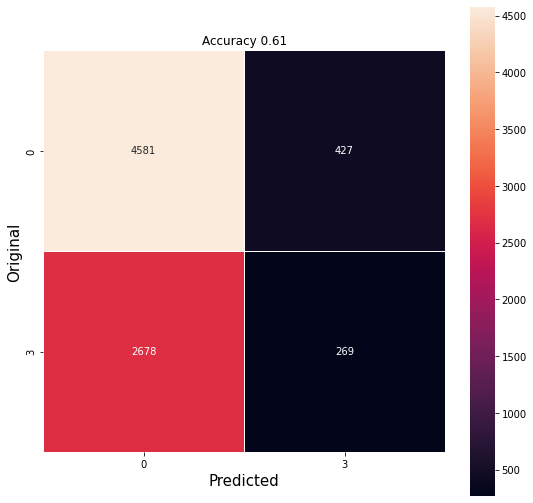

In [672]:
cm = confusion_matrix(y_test741, y_pred7413)
plt.figure(figsize=(9,9))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            linewidths=.5,
            square = True,
            xticklabels=np.unique(np.round(y_pred7413)),
            yticklabels=np.unique(np.round(y_pred7413)))
plt.title('Accuracy %.2f' % float(sum(np.around(y_pred7413)==y_test741)/len(y_test741)))
plt.ylabel('Original',fontsize=15)
plt.xlabel('Predicted',fontsize=15)

# Logistic Regression

# SVM